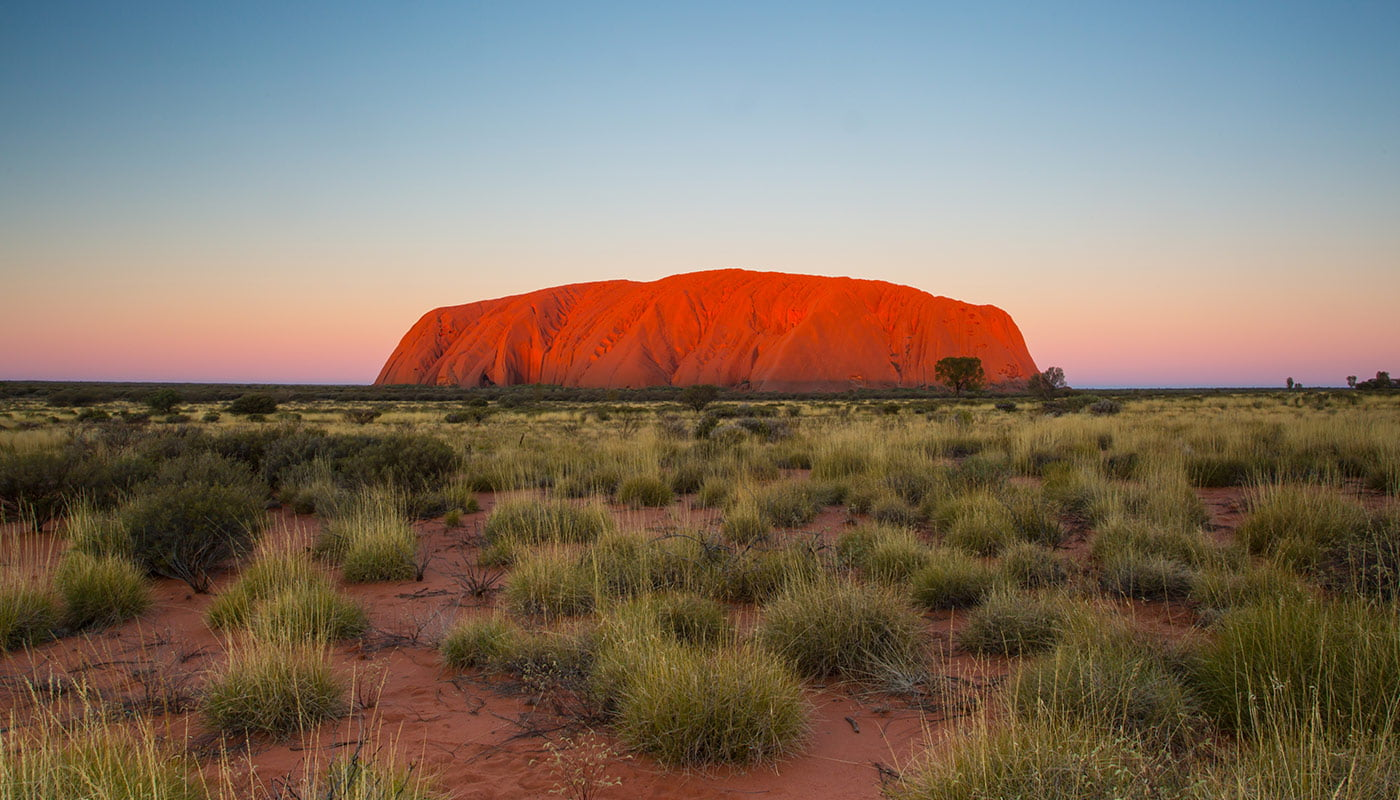


**Bastian Fierro - Daniel Santibañez - Tamar Andrade**

---



# Minería de Datos: Análisis de datos meteorológicos de Australia

En la actualidad, la minería de datos se ha convertido en una herramienta esencial para el análisis y la toma de decisiones en diferentes campos, como la industria, la investigación científica y el comercio. En este contexto, el análisis de datos meteorológicos se ha convertido en un área de gran interés, especialmente para la predicción del clima y la identificación de patrones climáticos.

En este proyecto, se realizará un análisis exploratorio de datos meteorológicos de Australia, con el objetivo de analizar las diferentes variables climáticas y su relación con el clima en distintas regiones del país. Para ello, se utilizarán herramientas de visualización de datos, como gráficos y diagramas, así como técnicas de minería de datos, como la imputación de valores nulos y la detección de outliers. Con todo ello, se espera obtener una mejor comprensión de los datos meteorológicos y de los patrones climáticos en Australia, lo que puede ser útil para la toma de decisiones en diferentes campos, como la agricultura, el turismo y la gestión de emergencias.



**Descripción de las variables del Dataset**



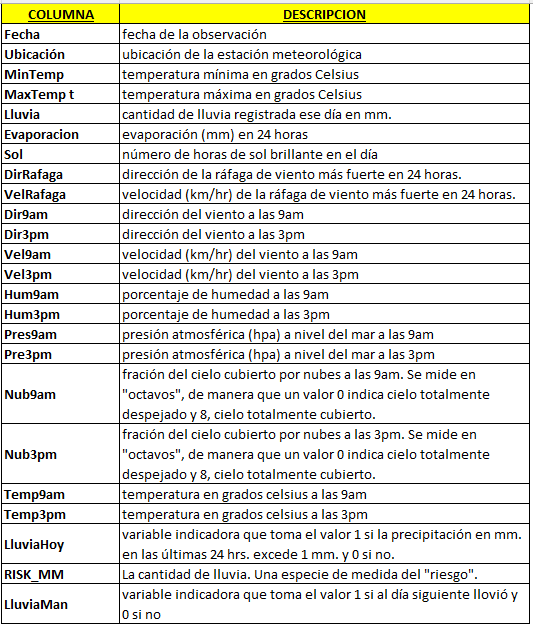

# Parte 1

## Importaciones y Carga de Datos

In [ ]:
#Importamos librerias
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [ ]:
#Cargamos el dataset desde Google Drive
drive.mount('/content/drive')
df = pd.read_csv(r'/content/drive/MyDrive/weatherAUS.csv')

Mounted at /content/drive


In [ ]:

# 1. Estructura de datos
print("Estructura de datos:")
print("Número de filas:", df.shape[0])
print("Número de columnas:", df.shape[1])
print()

# 2. Variables/Características
print("Variables/Características:")
print(df.dtypes)
print()

# 3. Muestra de datos
print("Muestra de datos:")
print(df.head())  # Muestra los primeros registros, puedes ajustar la cantidad con head(n) donde n es el número de registros a mostrar
print()

# Verificar las columnas con valores nulos
columnas_con_nulos = df.columns[df.isnull().any()].tolist()
print("Columnas con valores nulos:")
print(columnas_con_nulos)

Estructura de datos:
Número de filas: 142193
Número de columnas: 24

Variables/Características:
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

Muestra de datos:
         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7

##Analisis exploratorio de datos

Vista general de los datos

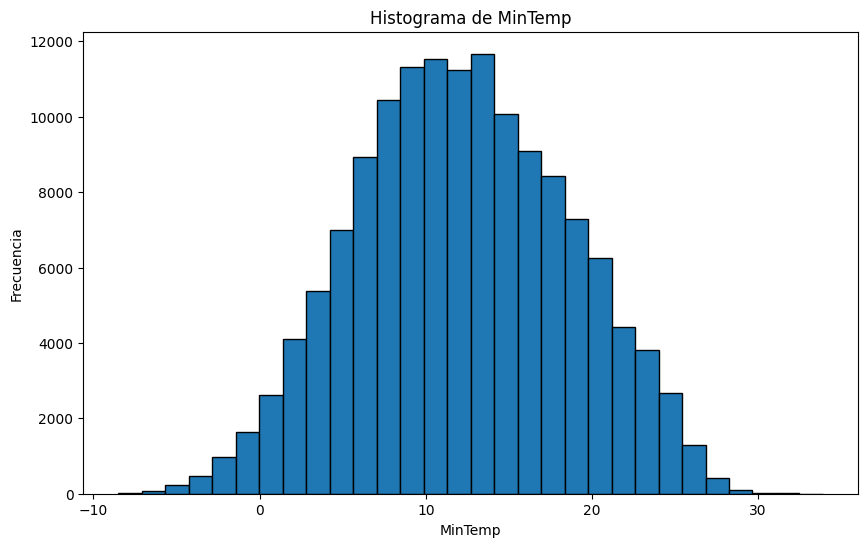

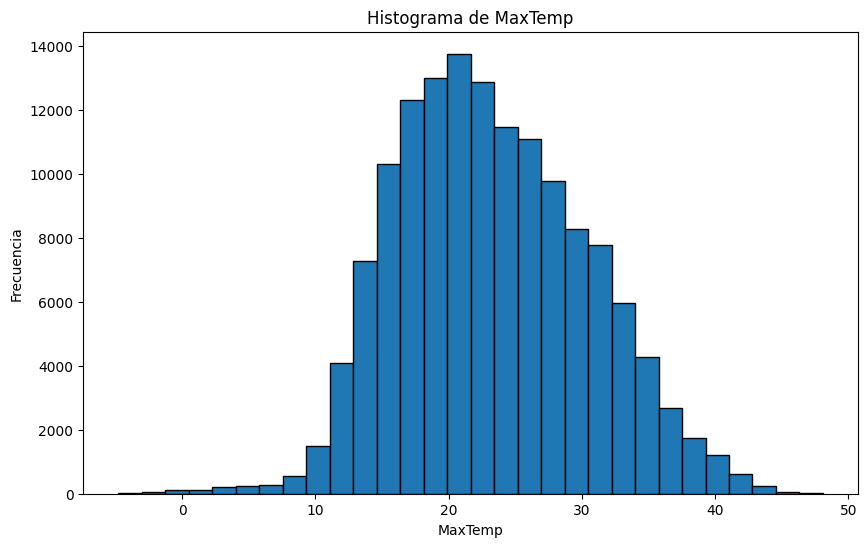

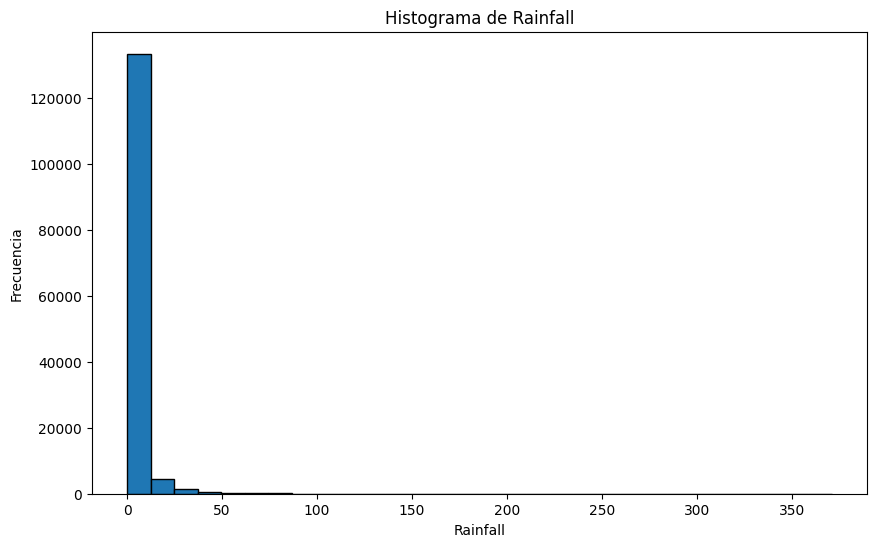

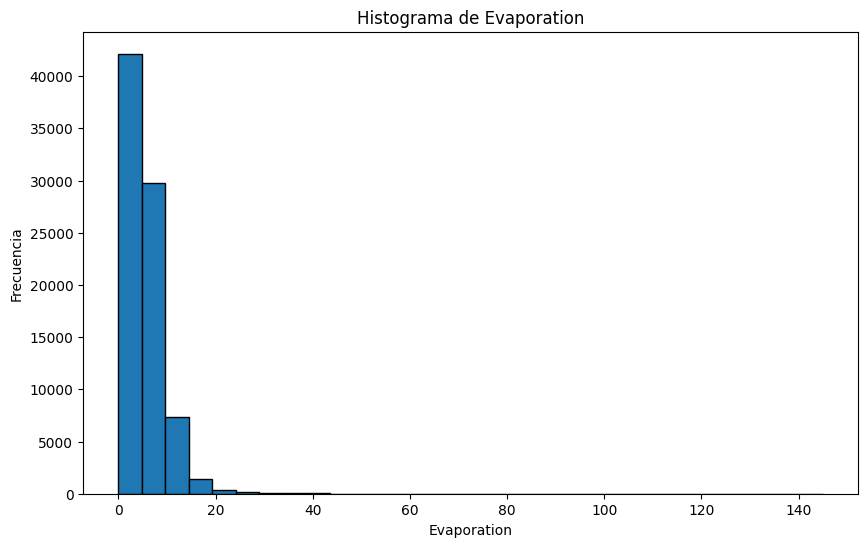

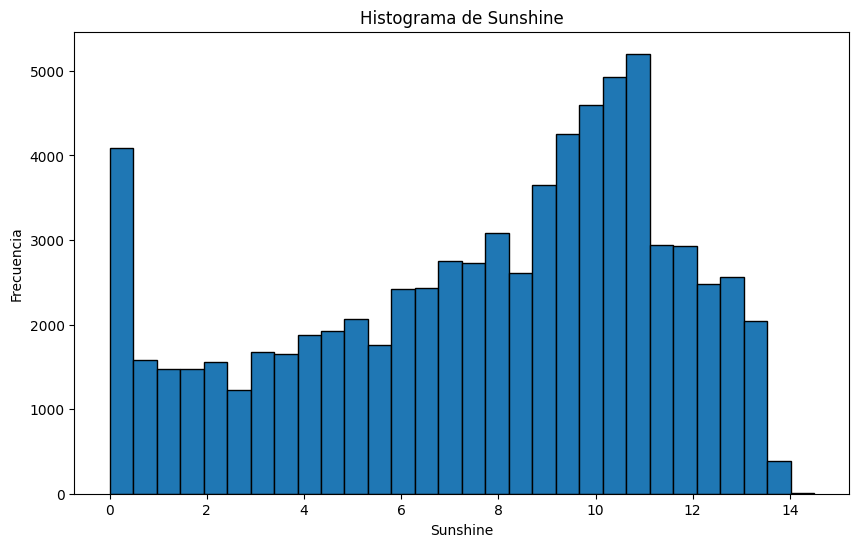

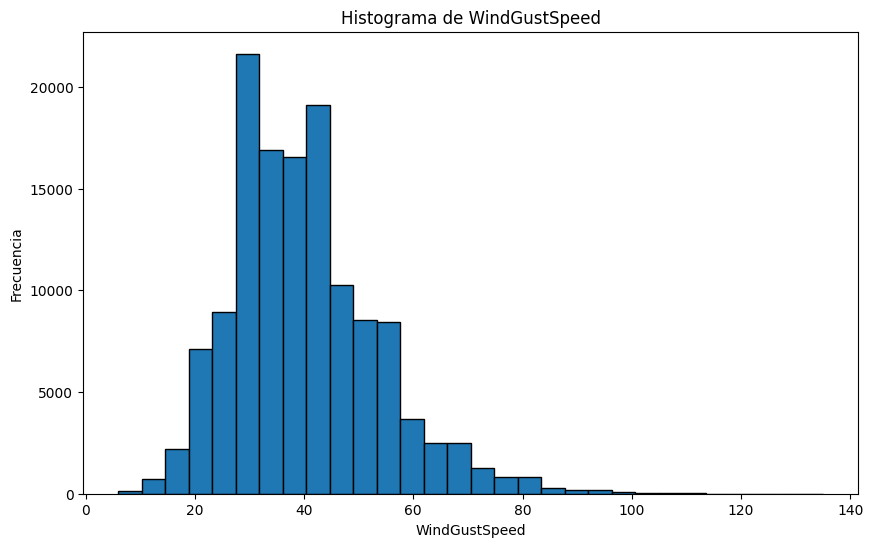

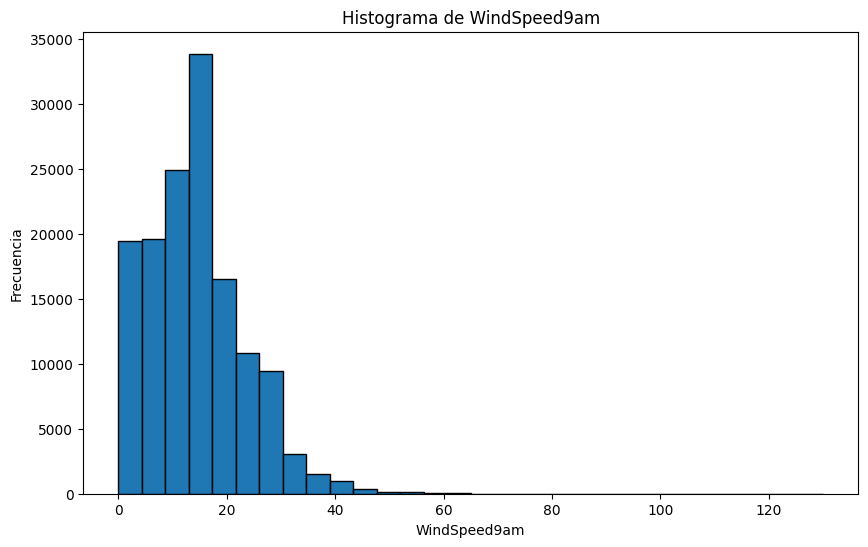

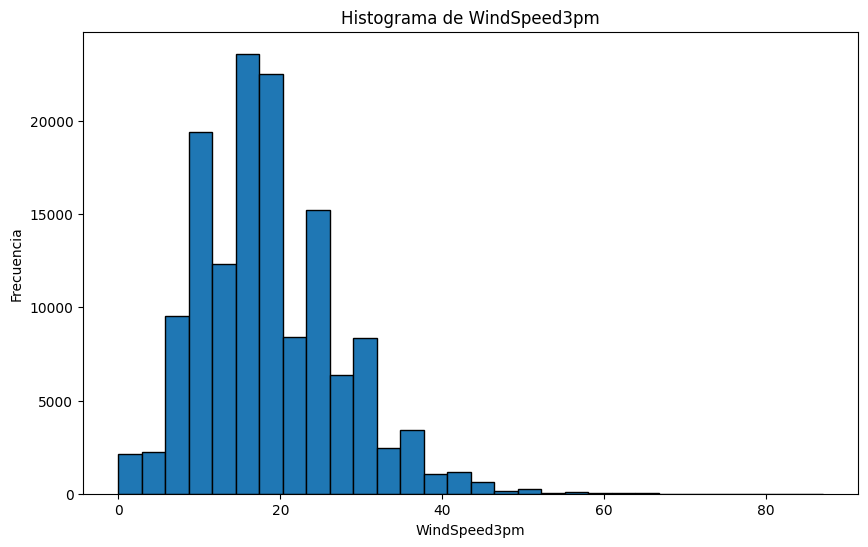

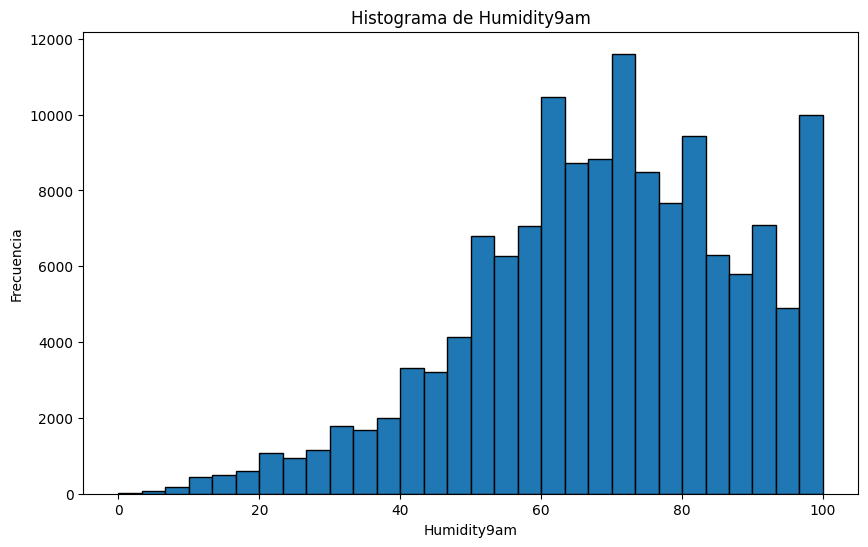

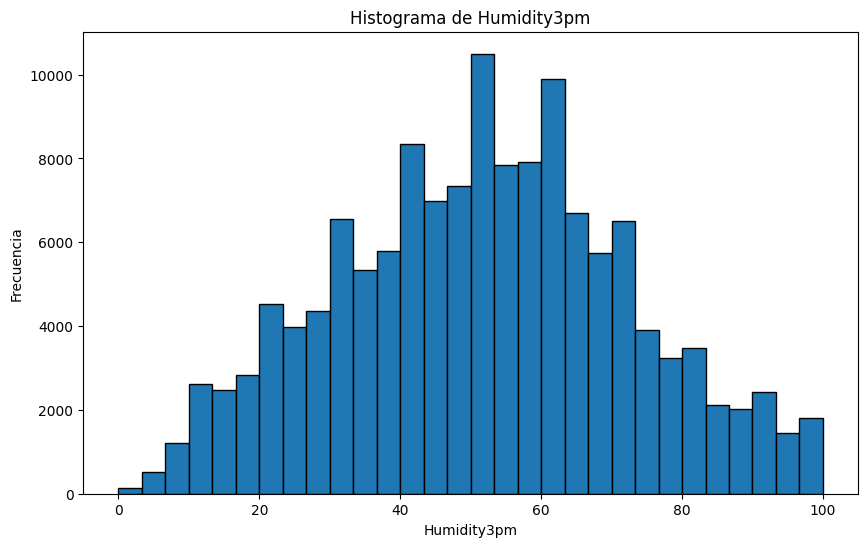

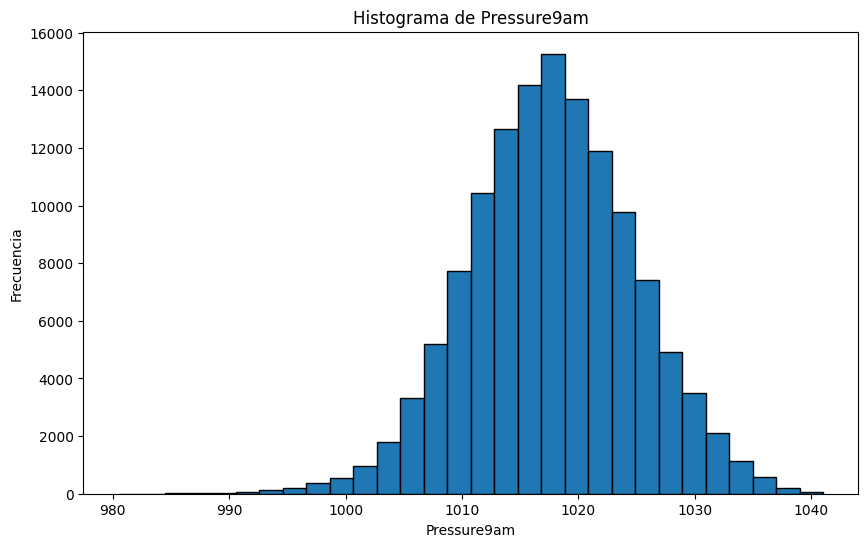

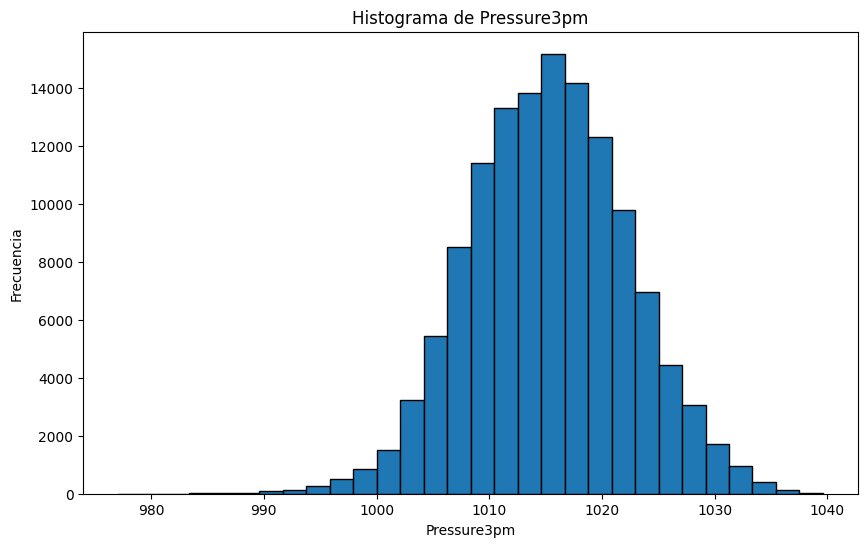

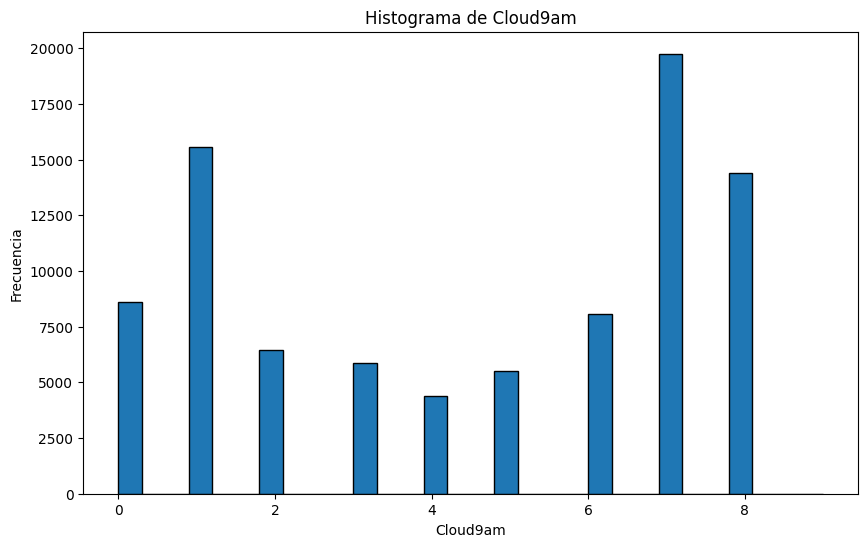

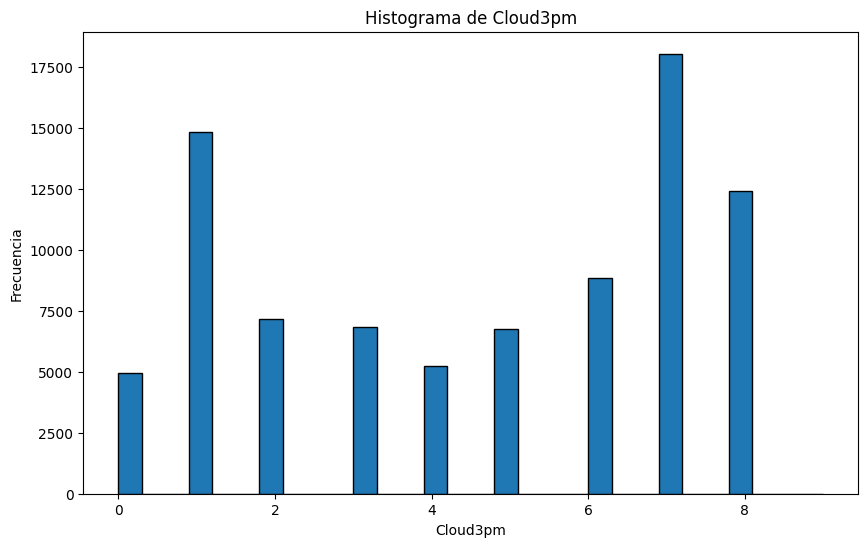

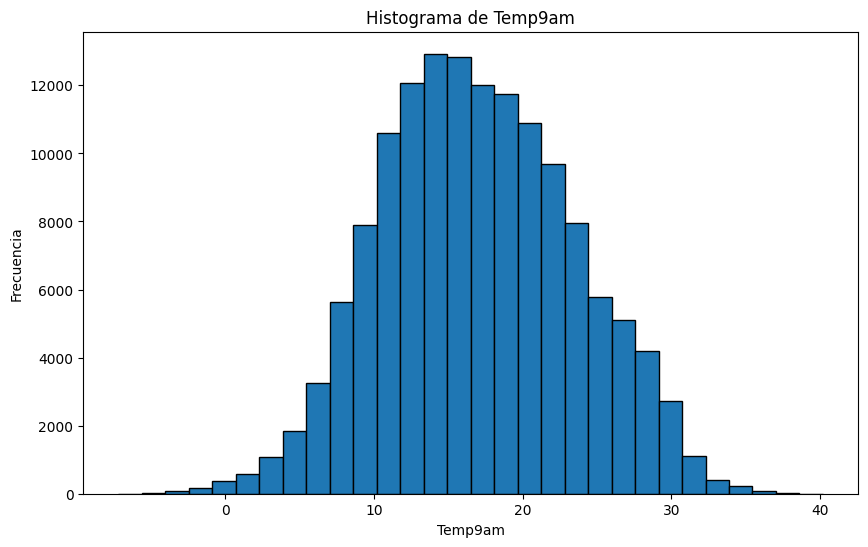

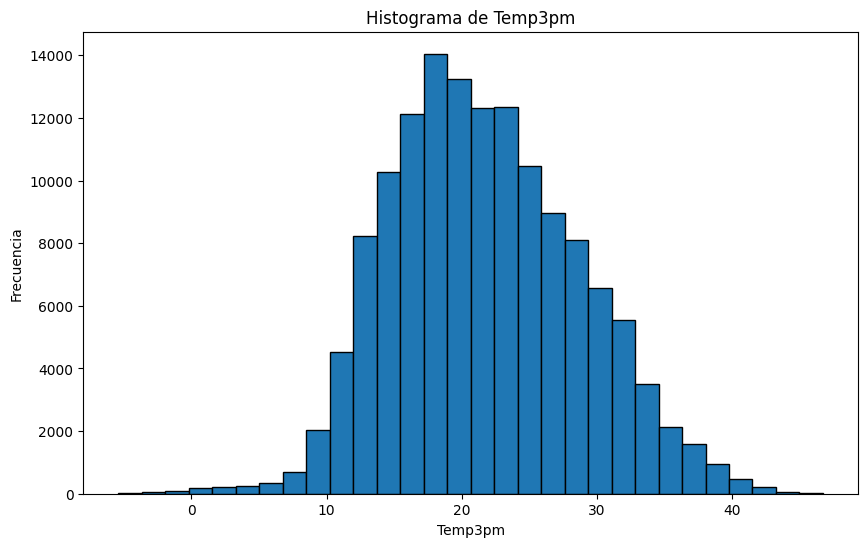

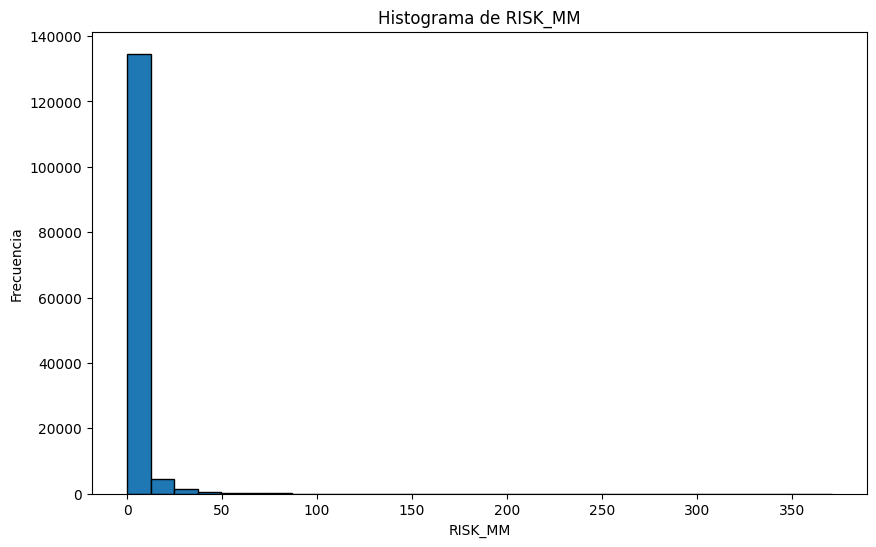

Estadística descriptiva:
             MinTemp        MaxTemp       Rainfall   Evaporation  \
count  141556.000000  141871.000000  140787.000000  81350.000000   
mean       12.186400      23.226784       2.349974      5.469824   
std         6.403283       7.117618       8.465173      4.188537   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.800000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  74377.000000  132923.000000  140845.000000  139563.000000   
mean       7.624853      39.984292      14.001988      18.637576   
std        3.781525      13.588801       8.893337       8.803345   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.900000   

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Estadística descriptiva
statistics = df.describe()

# Gráficos
for column in df.columns:
    if df[column].dtype != 'object':
        plt.figure(figsize=(10, 6))
        plt.hist(df[column].dropna(), bins=30, edgecolor='k')
        plt.title(f'Histograma de {column}')
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
        plt.show()

# Imprimir estadística descriptiva
print("Estadística descriptiva:")
print(statistics)


**Grafico de torta para visualizar el porcentaje de valores nulos en proporción a los valores no nulos**

El resultado indica que la mayoría de las variables del dataset no tienen valores nulos, y que únicamente un 9.3% de las observaciones contienen al menos una variable con valor nulo, lo cual igual es una gran cantidad de datos nulos.

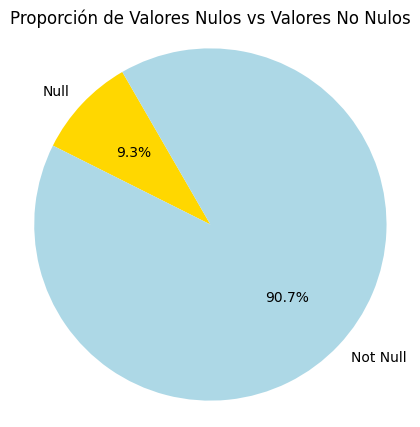

In [ ]:
null_count = df.isnull().sum()
not_null_count = df.notnull().sum()

# graficamos en un gráfico de torta
labels = ['Null', 'Not Null']
sizes = [null_count.sum(), not_null_count.sum()]
colors = ['gold', 'lightblue']

fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=120)
ax.axis('equal')
ax.set_title('Proporción de Valores Nulos vs Valores No Nulos')

plt.show()

**Graficos de dispersión para las variables Temp9am y Temp3pm**

El gráfico muestra la relación entre la temperatura registrada a las 9am y a las 3pm. Cada punto representa una observación del conjunto de datos, donde la posición en el eje x indica la temperatura registrada a las 3pm y la posición en el eje y indica la temperatura registrada a las 9am.


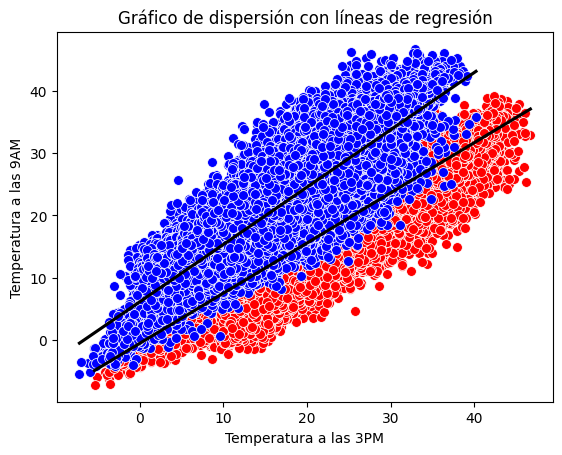

In [ ]:
sns.scatterplot(x="Temp3pm", y="Temp9am", data=df, color="red", s=50)
sns.scatterplot(x="Temp9am", y="Temp3pm", data=df, color="blue", s=50)

sns.regplot(x="Temp3pm", y="Temp9am", data=df, scatter=False, color="black")
sns.regplot(x="Temp9am", y="Temp3pm", data=df, scatter=False, color="black")

plt.title("Gráfico de dispersión con líneas de regresión")
plt.xlabel("Temperatura a las 3PM")
plt.ylabel("Temperatura a las 9AM")

plt.show()

Podemos observar una fuerte correlación positiva entre ambas variables, lo que indica que en general, cuando la temperatura es alta en la mañana, también tiende a ser alta en la tarde. Las líneas de regresión representan la tendencia general de los datos, con una pendiente positiva para ambas variables, lo que confirma la relación positiva observada.

Además, podemos ver que la variabilidad en la temperatura es mayor en la tarde que en la mañana:

In [ ]:
var_temp9am = np.var(df['Temp9am'])
var_temp3pm = np.var(df['Temp3pm'])

print("Variabilidad de la temperatura a las 9AM:", var_temp9am)
print("Variabilidad de la temperatura a las 3PM:", var_temp3pm)

Variabilidad de la temperatura a las 9AM: 42.15665114691055
Variabilidad de la temperatura a las 3PM: 48.12986358366277


**Grafico de Barras de la media de temperatura maxima y minima**

En el gráfico, se puede observar que la media de la temperatura máxima es mayor que la media de la temperatura mínima. Además, se puede ver que se ha utilizado el color rojo para representar la temperatura máxima y el color azul para representar la temperatura mínima.

En la salida del código, se muestran las medias de la temperatura máxima y la temperatura mínima, que son de 23.22 y 12.18 respectivamente.

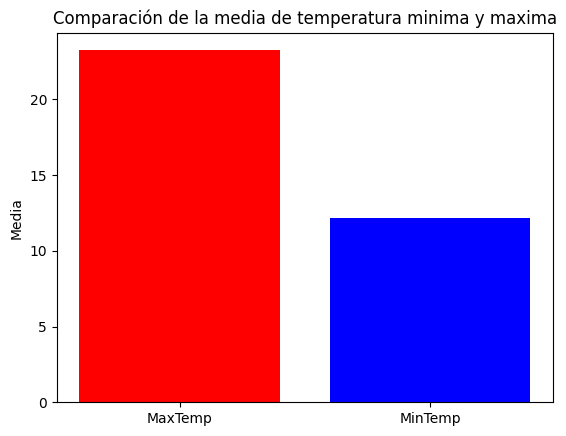

Media temperatura maxima:  23.226784191272355
Media temperatura minima:  12.186399728729265


In [ ]:
mean_max = df['MaxTemp'].mean()
mean_min = df['MinTemp'].mean()

means = {'MaxTemp': mean_max, 'MinTemp': mean_min}

df_means = pd.DataFrame(list(means.items()), columns=['Variable', 'Media'])

fig, ax = plt.subplots()
ax.bar(df_means['Variable'], df_means['Media'], color=['red', 'blue'])
ax.set_ylabel('Media')
ax.set_title('Comparación de la media de temperatura minima y maxima')
plt.show()

print("Media temperatura maxima: ", mean_max)
print("Media temperatura minima: ", mean_min)

## Selección de datos utiles

Para predecir la variable 'RainTomorrow', es importante considerar las variables meteorológicas relevantes que podrían influir en la lluvia del día siguiente.

Aquí hay una lista de variables a conservar y eliminar:

**Conservar:**

1. `Location` - La ubicación puede influir en el clima, por lo que podría ser útil.

2. `MinTemp` - La temperatura mínima puede tener un efecto en la posibilidad de precipitación.

3. `MaxTemp` - Similar a MinTemp, la temperatura máxima puede afectar la probabilidad de lluvia.

4. `WindGustDir` - La dirección de las ráfagas de viento puede influir en los patrones de lluvia.

5. `WindGustSpeed` - La velocidad del viento podría tener un impacto en la lluvia.

6. `WindDir9am` y `WindDir3pm` - La dirección del viento a diferentes horas puede afectar los patrones de lluvia.

7. `WindSpeed9am` y `WindSpeed3pm` - La velocidad del viento a diferentes horas puede tener un impacto en la lluvia.

8. `Humidity9am` y `Humidity3pm` - La humedad puede influir en la posibilidad de precipitación.

9. `Pressure9am` y `Pressure3pm` - La presión atmosférica puede afectar la posibilidad de lluvia.

10. `Cloud9am` y `Cloud3pm` - La cobertura nubosa puede ser un indicador de lluvia.

11. `Temp9am` y `Temp3pm` - Las temperaturas en diferentes momentos del día pueden influir en la lluvia.

12. `RainToday` - Si ha llovido hoy, puede haber una mayor posibilidad de que llueva mañana.

**Descartar:**

1. `Evaporation` - Aunque la evaporación puede estar correlacionada con el clima, a menudo se mide después del hecho y puede no estar disponible para la predicción en tiempo real. Además, puede estar altamente correlacionada con otras variables como la temperatura y la humedad.

2. `Sunshine` - Similar a la evaporación, la cantidad de sol puede no estar disponible para predicciones en tiempo real y puede estar altamente correlacionada con otras variables.

3. `RISK_MM` - Esta variable parece ser una medida de cuánta lluvia se registró, lo cual sería una fuga de datos si se está tratando de predecir si lloverá mañana o no. Esta columna debe ser eliminada para evitar la fuga de datos.


In [ ]:
df = df.drop(['Evaporation','Sunshine','RISK_MM'], axis=1)

In [ ]:
df

Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  \
0       2008-12-01   Albury     13.4     22.9       0.6           W   
1       2008-12-02   Albury      7.4     25.1       0.0         WNW   
2       2008-12-03   Albury     12.9     25.7       0.0         WSW   
3       2008-12-04   Albury      9.2     28.0       0.0          NE   
4       2008-12-05   Albury     17.5     32.3       1.0           W   
...            ...      ...      ...      ...       ...         ...   
142188  2017-06-20    Uluru      3.5     21.8       0.0           E   
142189  2017-06-21    Uluru      2.8     23.4       0.0           E   
142190  2017-06-22    Uluru      3.6     25.3       0.0         NNW   
142191  2017-06-23    Uluru      5.4     26.9       0.0           N   
142192  2017-06-24    Uluru      7.8     27.0       0.0          SE   

        WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity9am  \
0                44.0          W        WNW          20.0  ...         71.0   
1                44.0        NNW        WSW           4.0  ...         44.0   
2                46.0          W        WSW          19.0  ...         38.0   
3                24.0         SE          E          11.0  ...         45.0   
4                41.0        ENE         NW           7.0  ...         82.0   
...               ...        ...        ...           ...  ...          ...   
142188           31.0        ESE          E          15.0  ...         59.0   
142189           31.0         SE        ENE          13.0  ...         51.0   
142190           22.0         SE          N          13.0  ...         56.0   
142191           37.0         SE        WNW           9.0  ...         53.0   
142192           28.0        SSE          N          13.0  ...         51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
142188         27.0       1024.7       1021.2       NaN       NaN      9.4   
142189         24.0       1024.6       1020.3       NaN       NaN     10.1   
142190         21.0       1023.5       1019.1       NaN       NaN     10.9   
142191         24.0       1021.0       1016.8       NaN       NaN     12.5   
142192         24.0       1019.4       1016.5       3.0       2.0     15.1   

        Temp3pm  RainToday RainTomorrow  
0          21.8         No           No  
1          24.3         No           No  
2          23.2         No           No  
3          26.5         No           No  
4          29.7         No           No  
...         ...        ...          ...  
142188     20.9         No           No  
142189     22.4         No           No  
142190     24.5         No           No  
142191     26.1         No           No  
142192     26.0         No           No  

[142193 rows x 21 columns]

## Técnicas de limpieza	y preparación de datos

SimpleImputer para encargarse de nulos en columnas categóricas, antes de OneHot Encoder.

In [ ]:
from sklearn.impute import SimpleImputer

# Obtener las columnas categóricas con valores nulos
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

# Crear un SimpleImputer para imputar los valores nulos en las columnas categóricas
imputer = SimpleImputer(strategy='most_frequent')

# Imputar los valores nulos en las columnas categóricas
df[categorical_columns] = imputer.fit_transform(df[categorical_columns])


In [ ]:
df

Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  \
0       2008-12-01   Albury     13.4     22.9       0.6           W   
1       2008-12-02   Albury      7.4     25.1       0.0         WNW   
2       2008-12-03   Albury     12.9     25.7       0.0         WSW   
3       2008-12-04   Albury      9.2     28.0       0.0          NE   
4       2008-12-05   Albury     17.5     32.3       1.0           W   
...            ...      ...      ...      ...       ...         ...   
142188  2017-06-20    Uluru      3.5     21.8       0.0           E   
142189  2017-06-21    Uluru      2.8     23.4       0.0           E   
142190  2017-06-22    Uluru      3.6     25.3       0.0         NNW   
142191  2017-06-23    Uluru      5.4     26.9       0.0           N   
142192  2017-06-24    Uluru      7.8     27.0       0.0          SE   

        WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity9am  \
0                44.0          W        WNW          20.0  ...         71.0   
1                44.0        NNW        WSW           4.0  ...         44.0   
2                46.0          W        WSW          19.0  ...         38.0   
3                24.0         SE          E          11.0  ...         45.0   
4                41.0        ENE         NW           7.0  ...         82.0   
...               ...        ...        ...           ...  ...          ...   
142188           31.0        ESE          E          15.0  ...         59.0   
142189           31.0         SE        ENE          13.0  ...         51.0   
142190           22.0         SE          N          13.0  ...         56.0   
142191           37.0         SE        WNW           9.0  ...         53.0   
142192           28.0        SSE          N          13.0  ...         51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
142188         27.0       1024.7       1021.2       NaN       NaN      9.4   
142189         24.0       1024.6       1020.3       NaN       NaN     10.1   
142190         21.0       1023.5       1019.1       NaN       NaN     10.9   
142191         24.0       1021.0       1016.8       NaN       NaN     12.5   
142192         24.0       1019.4       1016.5       3.0       2.0     15.1   

        Temp3pm  RainToday RainTomorrow  
0          21.8         No           No  
1          24.3         No           No  
2          23.2         No           No  
3          26.5         No           No  
4          29.7         No           No  
...         ...        ...          ...  
142188     20.9         No           No  
142189     22.4         No           No  
142190     24.5         No           No  
142191     26.1         No           No  
142192     26.0         No           No  

[142193 rows x 21 columns]

In [ ]:

# 1. Estructura de datos
print("Estructura de datos:")
print("Número de filas:", df.shape[0])
print("Número de columnas:", df.shape[1])
print()

# 2. Variables/Características
print("Variables/Características:")
print(df.dtypes)
print()

# 3. Muestra de datos
print("Muestra de datos:")
print(df.head())  # Muestra los primeros registros, puedes ajustar la cantidad con head(n) donde n es el número de registros a mostrar
print()

# Verificar las columnas con valores nulos
columnas_con_nulos = df.columns[df.isnull().any()].tolist()
print("Columnas con valores nulos:")
print(columnas_con_nulos)

Estructura de datos:
Número de filas: 142193
Número de columnas: 21

Variables/Características:
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Muestra de datos:
         Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0  2008-12-01   Albury     13.4     22.9       0.6           W           44.0   
1  2008-12-02   Albury      7.4     25.1       0.0         WNW           44.0   
2  2008-12-03   Albury     12.9     25.7       0.0         WSW           46.0   
3  2008-12-04   Albury

OneHotEncoder para columnas categoricas

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Obtener las columnas categóricas para aplicar OneHotEncoder
categorical_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

# Crear el codificador OneHotEncoder
encoder = OneHotEncoder()

# Codificar las columnas categóricas sin nulos
encoded_data = encoder.fit_transform(df[categorical_columns])

# Obtener los nombres de las características después de la codificación
feature_names = encoder.get_feature_names_out(categorical_columns)

# Convertir los datos codificados a un DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=feature_names)

# Concatenar el DataFrame codificado con el DataFrame original
df_encoded = pd.concat([df.drop(categorical_columns, axis=1), encoded_df], axis=1)

# Agregar las columnas 'RainToday' y 'RainTomorrow' al DataFrame codificado sin aplicar OneHotEncoder
df_encoded['RainToday'] = df['RainToday']
df_encoded['RainTomorrow'] = df['RainTomorrow']


In [ ]:
df_encoded

Date  MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
0       2008-12-01     13.4     22.9       0.6           44.0          20.0   
1       2008-12-02      7.4     25.1       0.0           44.0           4.0   
2       2008-12-03     12.9     25.7       0.0           46.0          19.0   
3       2008-12-04      9.2     28.0       0.0           24.0          11.0   
4       2008-12-05     17.5     32.3       1.0           41.0           7.0   
...            ...      ...      ...       ...            ...           ...   
142188  2017-06-20      3.5     21.8       0.0           31.0          15.0   
142189  2017-06-21      2.8     23.4       0.0           31.0          13.0   
142190  2017-06-22      3.6     25.3       0.0           22.0          13.0   
142191  2017-06-23      5.4     26.9       0.0           37.0           9.0   
142192  2017-06-24      7.8     27.0       0.0           28.0          13.0   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  ...  \
0               24.0         71.0         22.0       1007.7  ...   
1               22.0         44.0         25.0       1010.6  ...   
2               26.0         38.0         30.0       1007.6  ...   
3                9.0         45.0         16.0       1017.6  ...   
4               20.0         82.0         33.0       1010.8  ...   
...              ...          ...          ...          ...  ...   
142188          13.0         59.0         27.0       1024.7  ...   
142189          11.0         51.0         24.0       1024.6  ...   
142190           9.0         56.0         21.0       1023.5  ...   
142191           9.0         53.0         24.0       1021.0  ...   
142192           7.0         51.0         24.0       1019.4  ...   

        WindDir3pm_NNW  WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  \
0                  0.0            0.0           0.0            0.0   
1                  0.0            0.0           0.0            0.0   
2                  0.0            0.0           0.0            0.0   
3                  0.0            0.0           0.0            0.0   
4                  0.0            1.0           0.0            0.0   
...                ...            ...           ...            ...   
142188             0.0            0.0           0.0            0.0   
142189             0.0            0.0           0.0            0.0   
142190             0.0            0.0           0.0            0.0   
142191             0.0            0.0           0.0            0.0   
142192             0.0            0.0           0.0            0.0   

        WindDir3pm_SSE WindDir3pm_SSW WindDir3pm_SW  WindDir3pm_W  \
0                  0.0            0.0           0.0           0.0   
1                  0.0            0.0           0.0           0.0   
2                  0.0            0.0           0.0           0.0   
3                  0.0            0.0           0.0           0.0   
4                  0.0            0.0           0.0           0.0   
...                ...            ...           ...           ...   
142188             0.0            0.0           0.0           0.0   
142189             0.0            0.0           0.0           0.0   
142190             0.0            0.0           0.0           0.0   
142191             0.0            0.0           0.0           0.0   
142192             0.0            0.0           0.0           0.0   

        WindDir3pm_WNW  WindDir3pm_WSW  
0                  1.0             0.0  
1                  0.0             1.0  
2                  0.0             1.0  
3                  0.0             0.0  
4                  0.0             0.0  
...                ...             ...  
142188             0.0             0.0  
142189             0.0             0.0  
142190             0.0             0.0  
142191             1.0             0.0  
142192             0.0             0.0  

[142193 rows x 114 columns]

Transformación de Fecha a Numerico

In [ ]:
#Convertir la variable FECHA a tipo datetime
df_encoded['Date'] = pd.to_datetime(df['Date'])

# Extraer las variables numéricas año, mes y día
df_encoded['Year'] = df_encoded['Date'].dt.year
df_encoded['Month'] = df_encoded['Date'].dt.month
df_encoded['Day'] = df_encoded['Date'].dt.day

# Eliminar la variable original FECHA
df_encoded.drop('Date', axis=1, inplace=True)

In [ ]:
df_encoded

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0          13.4     22.9       0.6           44.0          20.0          24.0   
1           7.4     25.1       0.0           44.0           4.0          22.0   
2          12.9     25.7       0.0           46.0          19.0          26.0   
3           9.2     28.0       0.0           24.0          11.0           9.0   
4          17.5     32.3       1.0           41.0           7.0          20.0   
...         ...      ...       ...            ...           ...           ...   
142188      3.5     21.8       0.0           31.0          15.0          13.0   
142189      2.8     23.4       0.0           31.0          13.0          11.0   
142190      3.6     25.3       0.0           22.0          13.0           9.0   
142191      5.4     26.9       0.0           37.0           9.0           9.0   
142192      7.8     27.0       0.0           28.0          13.0           7.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  ...  \
0              71.0         22.0       1007.7       1007.1  ...   
1              44.0         25.0       1010.6       1007.8  ...   
2              38.0         30.0       1007.6       1008.7  ...   
3              45.0         16.0       1017.6       1012.8  ...   
4              82.0         33.0       1010.8       1006.0  ...   
...             ...          ...          ...          ...  ...   
142188         59.0         27.0       1024.7       1021.2  ...   
142189         51.0         24.0       1024.6       1020.3  ...   
142190         56.0         21.0       1023.5       1019.1  ...   
142191         53.0         24.0       1021.0       1016.8  ...   
142192         51.0         24.0       1019.4       1016.5  ...   

        WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  \
0                 0.0             0.0             0.0            0.0   
1                 0.0             0.0             0.0            0.0   
2                 0.0             0.0             0.0            0.0   
3                 0.0             0.0             0.0            0.0   
4                 0.0             0.0             0.0            0.0   
...               ...             ...             ...            ...   
142188            0.0             0.0             0.0            0.0   
142189            0.0             0.0             0.0            0.0   
142190            0.0             0.0             0.0            0.0   
142191            0.0             0.0             0.0            0.0   
142192            0.0             0.0             0.0            0.0   

       WindDir3pm_W WindDir3pm_WNW  WindDir3pm_WSW  Year  Month  Day  
0               0.0            1.0             0.0  2008     12    1  
1               0.0            0.0             1.0  2008     12    2  
2               0.0            0.0             1.0  2008     12    3  
3               0.0            0.0             0.0  2008     12    4  
4               0.0            0.0             0.0  2008     12    5  
...             ...            ...             ...   ...    ...  ...  
142188          0.0            0.0             0.0  2017      6   20  
142189          0.0            0.0             0.0  2017      6   21  
142190          0.0            0.0             0.0  2017      6   22  
142191          0.0            1.0             0.0  2017      6   23  
142192          0.0            0.0             0.0  2017      6   24  

[142193 rows x 116 columns]

In [ ]:

# 1. Estructura de datos
print("Estructura de datos:")
print("Número de filas:", df_encoded.shape[0])
print("Número de columnas:", df_encoded.shape[1])
print()

# 2. Variables/Características
print("Variables/Características:")
print(df_encoded.dtypes)
print()

# 3. Muestra de datos
print("Muestra de datos:")
print(df_encoded.head())  # Muestra los primeros registros, puedes ajustar la cantidad con head(n) donde n es el número de registros a mostrar
print()

# Verificar las columnas con valores nulos
columnas_con_nulos = df_encoded.columns[df_encoded.isnull().any()].tolist()
print("Columnas con valores nulos:")
print(columnas_con_nulos)

Estructura de datos:
Número de filas: 142193
Número de columnas: 116

Variables/Características:
MinTemp           float64
MaxTemp           float64
Rainfall          float64
WindGustSpeed     float64
WindSpeed9am      float64
                   ...   
WindDir3pm_WNW    float64
WindDir3pm_WSW    float64
Year                int64
Month               int64
Day                 int64
Length: 116, dtype: object

Muestra de datos:
   MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0     13.4     22.9       0.6           44.0          20.0          24.0   
1      7.4     25.1       0.0           44.0           4.0          22.0   
2     12.9     25.7       0.0           46.0          19.0          26.0   
3      9.2     28.0       0.0           24.0          11.0           9.0   
4     17.5     32.3       1.0           41.0           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  ...  WindDir3pm_SE  \
0         71.0         22.0       100

Cambio de RainTomorrow y RainToday de object a numerico, siendo Yes = 1 y No = 0.

In [ ]:
# Mapear los valores de las columnas "RainTomorrow" y "RainToday" a valores numéricos
df_encoded['RainTomorrow'] = df_encoded['RainTomorrow'].map({'Yes': 1, 'No': 0})
df_encoded['RainToday'] = df_encoded['RainToday'].map({'Yes': 1, 'No': 0})

df_encoded

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0          13.4     22.9       0.6           44.0          20.0          24.0   
1           7.4     25.1       0.0           44.0           4.0          22.0   
2          12.9     25.7       0.0           46.0          19.0          26.0   
3           9.2     28.0       0.0           24.0          11.0           9.0   
4          17.5     32.3       1.0           41.0           7.0          20.0   
...         ...      ...       ...            ...           ...           ...   
142188      3.5     21.8       0.0           31.0          15.0          13.0   
142189      2.8     23.4       0.0           31.0          13.0          11.0   
142190      3.6     25.3       0.0           22.0          13.0           9.0   
142191      5.4     26.9       0.0           37.0           9.0           9.0   
142192      7.8     27.0       0.0           28.0          13.0           7.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  ...  \
0              71.0         22.0       1007.7       1007.1  ...   
1              44.0         25.0       1010.6       1007.8  ...   
2              38.0         30.0       1007.6       1008.7  ...   
3              45.0         16.0       1017.6       1012.8  ...   
4              82.0         33.0       1010.8       1006.0  ...   
...             ...          ...          ...          ...  ...   
142188         59.0         27.0       1024.7       1021.2  ...   
142189         51.0         24.0       1024.6       1020.3  ...   
142190         56.0         21.0       1023.5       1019.1  ...   
142191         53.0         24.0       1021.0       1016.8  ...   
142192         51.0         24.0       1019.4       1016.5  ...   

        WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  \
0                 0.0             0.0             0.0            0.0   
1                 0.0             0.0             0.0            0.0   
2                 0.0             0.0             0.0            0.0   
3                 0.0             0.0             0.0            0.0   
4                 0.0             0.0             0.0            0.0   
...               ...             ...             ...            ...   
142188            0.0             0.0             0.0            0.0   
142189            0.0             0.0             0.0            0.0   
142190            0.0             0.0             0.0            0.0   
142191            0.0             0.0             0.0            0.0   
142192            0.0             0.0             0.0            0.0   

        WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  Year  Month  Day  
0                0.0             1.0             0.0  2008     12    1  
1                0.0             0.0             1.0  2008     12    2  
2                0.0             0.0             1.0  2008     12    3  
3                0.0             0.0             0.0  2008     12    4  
4                0.0             0.0             0.0  2008     12    5  
...              ...             ...             ...   ...    ...  ...  
142188           0.0             0.0             0.0  2017      6   20  
142189           0.0             0.0             0.0  2017      6   21  
142190           0.0             0.0             0.0  2017      6   22  
142191           0.0             1.0             0.0  2017      6   23  
142192           0.0             0.0             0.0  2017      6   24  

[142193 rows x 116 columns]

Division de caracteristicas y variable objetivo. Estandarización de las caracteristicas.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Paso 1: Dividir en características (X) y variable objetivo (y)
X = df_encoded.drop('RainTomorrow', axis=1)
y = df_encoded['RainTomorrow']

# Paso 2: Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: Estandarización de las características (opcional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


KNN Imputer para encargarse de los nulos restantes (1 hora)

In [ ]:
'''
from sklearn.impute import KNNImputer

# create the imputer
imputer = KNNImputer(n_neighbors=1)

# fit on the training data and transform it
X_train_imputed = imputer.fit_transform(X_train_scaled)

# transform the test data
X_test_imputed = imputer.transform(X_test_scaled)


Guardar resultados de KNN Imputer para no repetir el proceso cada vez que se ejecute el notebook.

In [ ]:
'''
# convertir arrays X numpy a pandas dataframes
X_train_df = pd.DataFrame(X_train_imputed, columns = X_train.columns)
X_test_df = pd.DataFrame(X_test_imputed, columns = X_test.columns)

# guardar 'X' como csv e 'y' como array
X_train_df.to_csv('/content/drive/MyDrive/X_train_data_KNNIMPUTER.csv', index=False)
X_test_df.to_csv('/content/drive/MyDrive/X_test_data_KNNIMPUTER.csv', index=False)
np.save('/content/drive/MyDrive/y_train.npy', y_train)
np.save('/content/drive/MyDrive/y_test.npy', y_test)



# Parte 2

## Carga de archivos procesados y transformados

Cargar resultados de KNN Imputer para no repetir el proceso cada vez que se ejecute el notebook.

In [ ]:
#Importamos librerias
#from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# cargar archivosdesde drive csv
X_train_df = pd.read_csv('/content/drive/MyDrive/X_train_data_KNNIMPUTER.csv')
X_test_df = pd.read_csv('/content/drive/MyDrive/X_test_data_KNNIMPUTER.csv')
y_train = np.load('/content/drive/MyDrive/y_train.npy')
y_test = np.load('/content/drive/MyDrive/y_test.npy')

In [ ]:
# Cargar archivos de forma local csv
'''
X_train_df = pd.read_csv('X_train_data_KNNIMPUTER.csv')
X_test_df = pd.read_csv('X_test_data_KNNIMPUTER.csv')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

In [ ]:
# Crear DataFrames a partir de los conjuntos de datos imputados
#imputed_df_train = pd.DataFrame(X_train_df, columns=X_train.columns)
#imputed_df_test = pd.DataFrame(X_test_df, columns=X_test.columns)
imputed_df_train = X_train_df
imputed_df_test = X_test_df
combined_df = pd.concat([imputed_df_train, imputed_df_test], ignore_index=True)


In [ ]:
combined_df

MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
0       0.456958  0.095135 -0.277289       1.992113      0.563441   
1      -0.386956 -1.267578  0.620362       0.739796      0.113213   
2       0.160025  0.305864 -0.277289      -0.733519     -0.899800   
3      -0.715144 -1.183287 -0.277289       3.981087      1.801569   
4       0.113141 -0.143691 -0.277289      -0.217859      0.113213   
...          ...       ...       ...            ...           ...   
142188 -1.480917 -1.899765 -0.277289      -1.028181     -0.787243   
142189 -1.121473 -0.045351  0.124292       0.076804     -0.111901   
142190 -0.152535  0.404204 -0.277289      -0.659853     -0.111901   
142191 -0.605748 -0.340371 -0.277289       0.445133      1.126227   
142192 -0.511980 -0.649440 -0.277289      -0.733519     -0.337015   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  ...  \
0           0.383771    -1.616995     0.794900    -2.214972    -1.826360  ...   
1           1.066300     1.163261     0.217957    -1.329062    -1.073546  ...   
2          -0.185002     0.533769     0.554507     1.061490     0.886612  ...   
3           1.862583    -0.882588    -0.310908    -1.835296    -1.968400  ...   
4           0.156262     0.009192     0.025642     0.752125     0.843999  ...   
...              ...          ...          ...          ...          ...  ...   
142188     -2.118832     0.376396     2.093023     0.034959     0.048573  ...   
142189      0.838790     0.376396    -0.935930     0.316200     0.446286  ...   
142190      0.611281    -0.462926    -0.647458     1.497414     1.326937  ...   
142191      0.611281    -0.672757    -0.743616    -0.358779    -0.207099  ...   
142192     -1.095040    -0.148181     0.025642     0.822435     0.716163  ...   

        WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  \
0           -0.335520       -0.263912        -0.24479      -0.262537   
1           -0.335520       -0.263912        -0.24479      -0.262537   
2           -0.335520       -0.263912        -0.24479      -0.262537   
3           -0.335520       -0.263912        -0.24479      -0.262537   
4           -0.335520        3.789147        -0.24479      -0.262537   
...               ...             ...             ...            ...   
142188       2.980446       -0.263912        -0.24479      -0.262537   
142189      -0.335520       -0.263912        -0.24479      -0.262537   
142190      -0.335520       -0.263912        -0.24479      -0.262537   
142191      -0.335520        3.789147        -0.24479      -0.262537   
142192      -0.335520       -0.263912        -0.24479      -0.262537   

        WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW      Year     Month  \
0           3.657265       -0.254349       -0.265167 -1.478581  1.051347   
1           3.657265       -0.254349       -0.265167 -0.691642  0.759234   
2          -0.273428       -0.254349       -0.265167 -1.085111 -0.701332   
3          -0.273428        3.931598       -0.265167 -0.691642  0.175008   
4          -0.273428       -0.254349       -0.265167  0.882237 -0.701332   
...              ...             ...             ...       ...       ...   
142188     -0.273428       -0.254349       -0.265167 -0.298172  0.467121   
142189     -0.273428        3.931598       -0.265167  1.275706  1.051347   
142190     -0.273428       -0.254349       -0.265167  0.882237  0.759234   
142191     -0.273428       -0.254349       -0.265167 -0.298172  1.343460   
142192     -0.273428       -0.254349       -0.265167  0.095298  0.175008   

             Day  
0      -0.194129  
1       1.169916  
2       0.487893  
3      -0.421470  
4      -0.307800  
...          ...  
142188 -0.876152  
142189 -1.217163  
142190 -0.421470  
142191  0.033212  
142192 -1.444504  

[142193 rows x 115 columns]

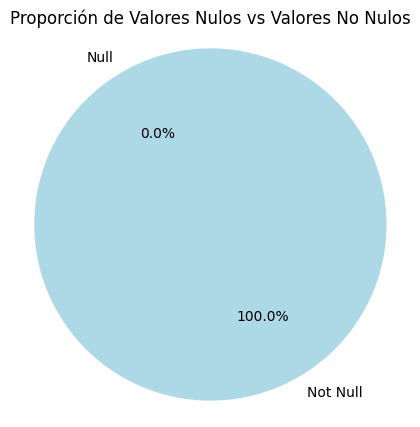

In [ ]:
null_count = combined_df.isnull().sum()
not_null_count = combined_df.notnull().sum()

# graficamos en un gráfico de torta
labels = ['Null', 'Not Null']
sizes = [null_count.sum(), not_null_count.sum()]
colors = ['gold', 'lightblue']

fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=120)
ax.axis('equal')
ax.set_title('Proporción de Valores Nulos vs Valores No Nulos')

plt.show()

In [ ]:
pd.set_option('display.max_columns', None)


# 1. Estructura de datos
print("Estructura de datos:")
print("Número de filas:", combined_df.shape[0])
print("Número de columnas:", combined_df.shape[1])
print()

# 2. Variables/Características
print("Variables/Características:")
print(combined_df.dtypes)
print()

# 3. Muestra de datos
print("Muestra de datos:")
print(combined_df.head())  # Muestra los primeros registros, puedes ajustar la cantidad con head(n) donde n es el número de registros a mostrar
print()

# Verificar las columnas con valores nulos
columnas_con_nulos = combined_df.columns[combined_df.isnull().any()].tolist()
print("Columnas con valores nulos:")
print(0)

print("Target (y):")
print("RainTomorrow")

Estructura de datos:
Número de filas: 142193
Número de columnas: 115

Variables/Características:
MinTemp           float64
MaxTemp           float64
Rainfall          float64
WindGustSpeed     float64
WindSpeed9am      float64
                   ...   
WindDir3pm_WNW    float64
WindDir3pm_WSW    float64
Year              float64
Month             float64
Day               float64
Length: 115, dtype: object

Muestra de datos:
    MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0  0.456958  0.095135 -0.277289       1.992113      0.563441      0.383771   
1 -0.386956 -1.267578  0.620362       0.739796      0.113213      1.066300   
2  0.160025  0.305864 -0.277289      -0.733519     -0.899800     -0.185002   
3 -0.715144 -1.183287 -0.277289       3.981087      1.801569      1.862583   
4  0.113141 -0.143691 -0.277289      -0.217859      0.113213      0.156262   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0    -1.616995     0.7949

## Algoritmos predictivos no supervisados

In [ ]:
sample_df = combined_df.sample(n=25000)  # Muestra aleatoria de 25000 filas para hacerle modelos y evaluaciones


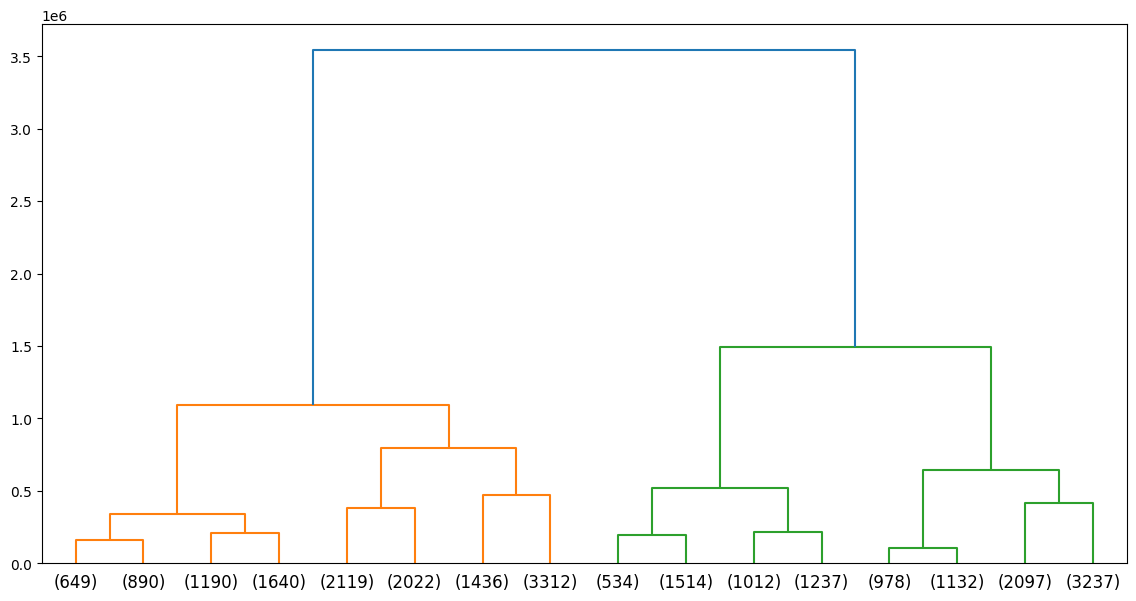

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# Antes de hacer el clustering es importante escalar los datos, pero nuestros datos ya estan escalados.

# Define el algoritmo de clustering
cluster = AgglomerativeClustering(n_clusters=None, metric='euclidean', linkage='ward', distance_threshold=0)

# Ajusta el algoritmo a tus datos
cluster.fit_predict(sample_df)

# Dibuja el dendrograma para visualizar los clusters
linkage_matrix = linkage(cluster.children_, 'ward')

plt.figure(figsize=(14,7))
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.show()


Interpretación del dendrograma:

Un dendrograma es como un árbol que muestra cómo se agrupan nuestros datos.


1.   **Eje y:** Cuanto más arriba en el árbol, más diferentes son los grupos entre sí.

2. **Líneas azules:** Estas líneas muestran cuando dos grupos se unen para formar un grupo más grande. Cuanto más arriba se une la línea, más diferentes son los grupos que se están uniendo.

3. **Jerarquía de los grupos:** Si sigues las líneas azules hacia abajo desde donde se unen, puedes ver cómo se forman los grupos más pequeños. Los grupos más pequeños están en la parte inferior del árbol.

4. **Ramas:** Son como las ramas de un árbol y representan subgrupos dentro de un grupo más grande. Cada vez que una rama se divide en dos, eso significa que un grupo grande se está dividiendo en dos grupos más pequeños.

5. **Colores de las ramas:** Los colores ayudan a identificar los diferentes grupos. En tu caso, hay dos colores, lo que significa que hay dos grupos principales en tus datos. Dentro de cada grupo principal, hay subgrupos más pequeños que tienen el mismo color.

El Clustering Jerárquico es otro método de aprendizaje no supervisado que se utiliza para predecir subgrupos dentro de los datos. A diferencia de la agrupación K-means, el clustering jerárquico no requiere que especifiquemos el número de clusters y puede generar una representación visual muy intuitiva de las relaciones entre los datos llamada dendrograma.

El Dendrograma es un diagrama de árbol que muestra las relaciones entre los objetos en un conjunto de datos en función de la distancia entre ellos. Cada hoja del dendrograma representa un punto de datos en el conjunto de datos, y cada nodo representa un grupo formado por la fusión de dos grupos o puntos de datos más pequeños. La altura del nodo indica la distancia entre los grupos o puntos de datos que se están fusionando.

En un dendrograma, la distancia entre los objetos se representa por la altura a la que los "enlaces" se fusionan en el diagrama. Cuanto más alta es la fusión, más disímiles son los grupos que se están fusionando.

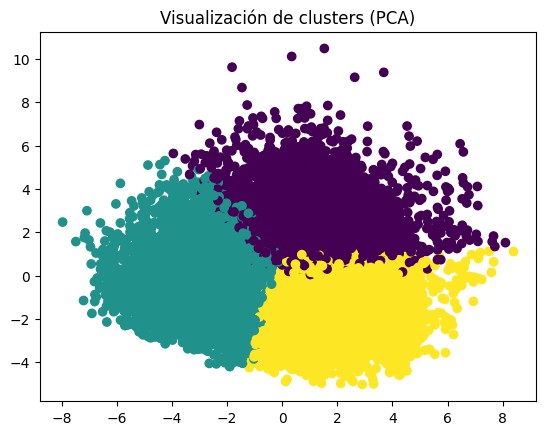

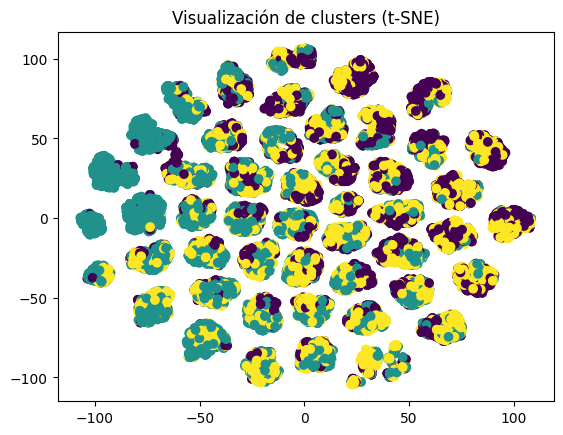

Silhouette Score: 0.024757081235938335
Davies-Bouldin Score: 5.590177673736787
Calinski-Harabasz Score: 610.1531519580599


In [ ]:
import warnings
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from matplotlib import pyplot as plt
# Ocultar advertencias
warnings.filterwarnings("ignore")

# Aplicar clustering con k-means
k = 3  # Número de clusters
kmeans = KMeans(n_clusters=k)
labels = kmeans.fit_predict(sample_df)

# Visualización de los clusters utilizando PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(sample_df)

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels)
plt.title('Visualización de clusters (PCA)')
plt.show()

# Visualización de los clusters utilizando t-SNE
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(sample_df)

plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=labels)
plt.title('Visualización de clusters (t-SNE)')
plt.show()

# Cálculo de métricas internas de evaluación
silhouette = silhouette_score(sample_df, labels)
davies_bouldin = davies_bouldin_score(sample_df, labels)
calinski_harabasz = calinski_harabasz_score(sample_df, labels)

print('Silhouette Score:', silhouette)
print('Davies-Bouldin Score:', davies_bouldin)
print('Calinski-Harabasz Score:', calinski_harabasz)



Gráficos de PCA y t-SNE: Estos gráficos son formas visuales de entender la organización de nuestros datos. Los diferentes colores representan diferentes "grupos" o "clusters". Cuando puntos del mismo color están cerca uno del otro, significa que esas muestras de datos son similares. Cuando los puntos están lejos entre sí, son diferentes.

En el primer gráfico (PCA), vemos tres grupos distintos, cada uno representado por un color. El grupo morado parece ser un poco más diverso o disperso, porque los puntos se extienden más en el eje vertical. En el segundo gráfico (t-SNE), los grupos son más difíciles de distinguir porque los puntos están más mezclados y dispersos.

En el segundo gráfico (t-SNE) presenta una estructura de los datos más compleja comparado con el gráfico de PCA. Aquí vemos varias agrupaciones o clusters dispersos en el espacio gráfico.

Los puntos de color azul verdoso están prominentemente concentrados en la parte izquierda del gráfico. Esto significa que un conjunto de datos, los que están en este grupo de color, presentan características muy similares entre sí, lo suficientemente similares para que el algoritmo t-SNE los agrupe de manera más densa en esa región.

Métricas de evaluación: Estos son números que nos ayudan a entender cuán bien se agruparon nuestros datos.

El "Silhouette Score" está cerca de 0, lo que sugiere que nuestros grupos no están bien definidos y algunos puntos pueden estar cerca del límite entre grupos.

El "Davies-Bouldin Score" es bastante alto, lo cual también sugiere que nuestros grupos no están bien definidos. Un valor alto es una mala señal en este caso.

El "Calinski-Harabasz Score" es relativamente alto, lo que normalmente es una buena señal porque indica que los grupos están bien separados. Sin embargo, las otras dos métricas sugieren lo contrario, por lo que esta métrica puede no ser completamente precisa en este caso.

En conclusión, los gráficos y métricas sugieren que nuestros datos no se agrupan muy bien en clusters claros. Esto puede deberse a la complejidad de los datos o a la elección del algoritmo y parámetros de agrupación. Aunque los gráficos nos dan una idea general de cómo están organizados nuestros datos, las métricas nos indican que la organización puede no ser muy clara o distintiva.

Cada una de estas métricas de agrupamiento se utiliza para evaluar la calidad de la agrupación en un conjunto de datos:

1. **Silhouette Score**: Esta métrica evalúa cuán cerca están los puntos en el mismo grupo y cuán lejos están los puntos en grupos diferentes.

   - Para un punto de datos, su coeficiente de silueta es la diferencia entre la distancia media al resto de puntos en su grupo (distancia intra-cluster) y la distancia media al grupo más cercano (distancia inter-cluster), dividida por el máximo de estos dos valores.

   - El valor de coeficiente de silueta oscila entre -1 y 1. Un valor alto indica que el punto está bien agrupado y un valor bajo indica que el punto está mal agrupado o que podría pertenecer a otro grupo. Un valor cercano a 0 sugiere que el punto está cerca del límite entre dos grupos.

   - El Silhouette Score es simplemente el promedio de todos los coeficientes de silueta para todos los puntos en el conjunto de datos.

2. **Davies-Bouldin Score**: Esta métrica compara la distancia media dentro del grupo (similitud) con la distancia entre grupos.

   - Para cada grupo, se calcula la "dispersión", que es la distancia media de cada punto al centroide del grupo.

   - Para cada par de grupos, se calcula una "ratio de Davies-Bouldin", que es la suma de las dispersiones de los dos grupos dividida por la distancia entre los centroides de los dos grupos.

   - El Davies-Bouldin Score es el promedio de las mayores ratios de Davies-Bouldin para cada grupo.

   - A diferencia de las otras dos métricas, un valor más bajo del índice de Davies-Bouldin es mejor ya que indica una mejor separación de los grupos.

3. **Calinski-Harabasz Score**: Esta métrica también compara la varianza dentro del grupo con la varianza entre grupos, pero lo hace de una manera ligeramente diferente a la puntuación de Davies-Bouldin.

   - Se calcula la dispersión entre grupos (la suma de las distancias cuadradas entre los centroides de los grupos y el centroide general) y la dispersión dentro de los grupos (la suma de las distancias cuadradas entre los puntos y sus centroides de grupo).

   - El Calinski-Harabasz Score es la dispersión entre grupos dividida por la dispersión dentro de los grupos, multiplicada por un factor que tiene en cuenta el número de grupos y el número de puntos.

   - Un valor más alto de la puntuación de Calinski-Harabasz es mejor ya que indica una mejor separación de los grupos.

### Detección de Anomalias

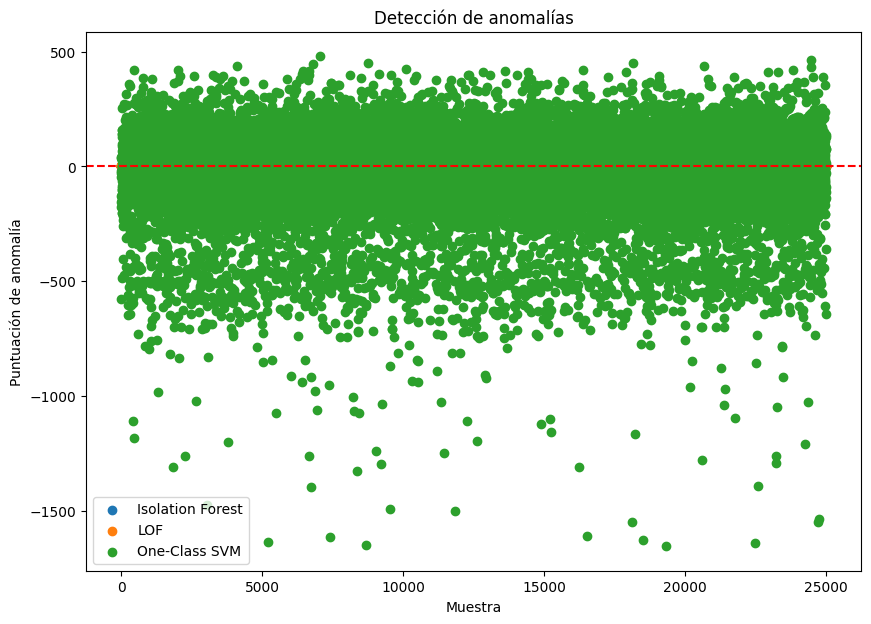

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from matplotlib import pyplot as plt

# Isolation Forest
isolation_forest = IsolationForest(contamination='auto')
isolation_forest.fit(sample_df)
anomaly_scores_if = isolation_forest.decision_function(sample_df)

# Local Outlier Factor (LOF)
lof = LocalOutlierFactor(contamination='auto')
anomaly_scores_lof = lof.fit_predict(sample_df)

# One-Class SVM
one_class_svm = OneClassSVM(nu=0.5)  # Valor predeterminado para 'nu'
one_class_svm.fit(sample_df)
anomaly_scores_svm = one_class_svm.decision_function(sample_df)

# Visualización de los resultados
plt.figure(figsize=(10, 7))
plt.scatter(range(len(sample_df)), anomaly_scores_if, label='Isolation Forest')
plt.scatter(range(len(sample_df)), anomaly_scores_lof, label='LOF')
plt.scatter(range(len(sample_df)), anomaly_scores_svm, label='One-Class SVM')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Muestra')
plt.ylabel('Puntuación de anomalía')
plt.title('Detección de anomalías')
plt.legend()
plt.show()


Interpretación los resultados:

Puntos verdes agrupados cerca de cero:

Los puntos verdes representan las muestras de datos que estamos analizando. Cada uno de estos puntos tiene una puntuación de anomalía que ha sido asignada por un algoritmo de detección de anomalías. Los algoritmos utilizados en este caso son Isolation Forest, LOF y One-Class SVM. Si muchos de estos puntos verdes están cerca del valor cero en el eje vertical, eso significa que estos puntos (o muestras de datos) tienen puntuaciones de anomalía bajas. En otras palabras, los algoritmos de detección de anomalías consideran que estos puntos son "normales" o que se ajustan a lo que se espera en los datos.

Puntos verdes muy por debajo de cero:

Por otro lado, puede haber puntos verdes que se sitúan muy por debajo del valor cero en el eje vertical. Estos puntos representan muestras de datos que los algoritmos de detección de anomalías han marcado con puntuaciones de anomalía muy bajas. Esto significa que los algoritmos consideran que estas muestras de datos son anómalas o atípicas; es decir, de alguna manera son diferentes o no se ajustan a la estructura general o patrón esperado de los datos.

Línea trazada roja ligeramente arriba de cero:

La línea roja que se ve ligeramente por encima de cero en el eje vertical se utiliza como un umbral o límite. Si una muestra de datos (un punto verde) tiene una puntuación de anomalía que se encuentra por encima de esta línea roja, se considera que esa muestra es anómala según los algoritmos de detección de anomalías. En otras palabras, si el punto verde está por encima de la línea roja, la muestra que representa se considera atípica o fuera de lo común.

Cambio de escala para observar puntos naranjas y azules:

Parece que algunos puntos (probablemente marcados en colores como naranja o azul) no se pueden ver debido a la escala del gráfico. Estos puntos pueden representar otros aspectos o categorías de los datos. Para poder visualizarlos, se propone cambiar la escala del eje vertical a un rango de -10 a 10. Esto permitirá visualizar estos puntos que actualmente pueden estar fuera del rango visual debido a la escala actual del gráfico en el siguiente codigo:

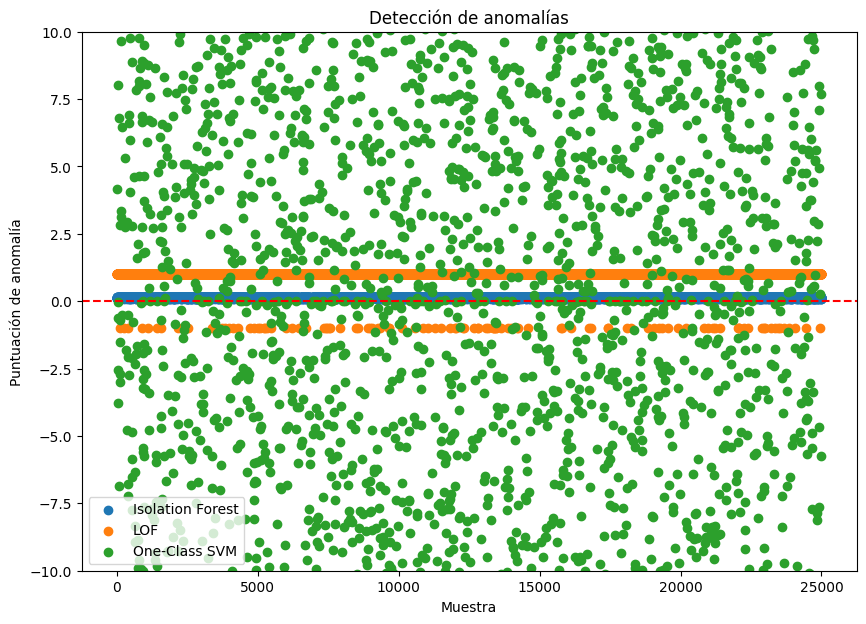

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from matplotlib import pyplot as plt

# Isolation Forest
isolation_forest = IsolationForest(contamination='auto')
isolation_forest.fit(sample_df)
anomaly_scores_if = isolation_forest.decision_function(sample_df)

# Local Outlier Factor (LOF)
lof = LocalOutlierFactor(contamination='auto')
anomaly_scores_lof = lof.fit_predict(sample_df)

# One-Class SVM
one_class_svm = OneClassSVM(nu=0.5)  # Valor predeterminado para 'nu'
one_class_svm.fit(sample_df)
anomaly_scores_svm = one_class_svm.decision_function(sample_df)

# Visualización de los resultados
plt.figure(figsize=(10, 7))
plt.scatter(range(len(sample_df)), anomaly_scores_if, label='Isolation Forest')
plt.scatter(range(len(sample_df)), anomaly_scores_lof, label='LOF')
plt.scatter(range(len(sample_df)), anomaly_scores_svm, label='One-Class SVM')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Muestra')
plt.ylabel('Puntuación de anomalía')
plt.title('Detección de anomalías')
plt.ylim(-10, 10)  # Ajuste del rango del eje y
plt.legend()
plt.show()


Puntos azules cerca del valor 0 en el eje x:

Los puntos azules representan las puntuaciones de anomalía para cada muestra en el conjunto de datos según un algoritmo de detección de anomalías. Cuando estos puntos forman una línea cerca del valor 0 en el eje x, significa que esas muestras tienen puntuaciones de anomalía cercanas a 0. Una puntuación de anomalía cerca de 0 generalmente indica que una muestra es "normal" o se ajusta a lo que se espera en los datos. Si hay muchas muestras que se agrupan cerca del valor 0, esto podría indicar que la mayoría de las muestras en los datos son normales o típicas.

Puntos naranjas en los valores 1 y -1 en el eje x:

Los puntos naranjas también representan puntuaciones de anomalía para las muestras en los datos, pero pueden estar generadas por un algoritmo de detección de anomalías diferente o representar una categoría diferente de los datos. Si estos puntos se agrupan en líneas cerca de los valores 1 y -1 en el eje x, esto significa que las muestras correspondientes a esos puntos tienen puntuaciones de anomalía cercanas a 1 o -1. Esto podría indicar la presencia de muestras anómalas o atípicas en esos lugares. Una puntuación de anomalía de 1 o -1 es generalmente más extremo que una puntuación cercana a 0 y, por lo tanto, es más probable que una muestra con una puntuación de anomalía de 1 o -1 sea considerada anómala o atípica.

En conclusión, el gráfico nos está proporcionando una representación visual de cómo las puntuaciones de anomalía para cada muestra se distribuyen en los datos. Las agrupaciones de puntos en ciertos valores pueden indicar regiones de los datos donde hay una concentración de muestras normales (puntos azules cerca de 0) o muestras anómalas (puntos naranjas cerca de 1 o -1). Esto puede ayudarnos a entender mejor la estructura de los datos y a identificar áreas donde podrían existir anomalías.

Ahora identifiquemos cuales son las muestras anomalas en nuestro dataset:

In [ ]:
# Identificar muestras anómalas utilizando Isolation Forest
isolation_forest = IsolationForest(contamination='auto')
isolation_forest.fit(sample_df)
anomaly_scores_if = isolation_forest.decision_function(sample_df)
anomalous_samples_if = np.where(anomaly_scores_if < 0)[0]  # Seleccionar muestras con puntuaciones de anomalía negativas

# Identificar muestras anómalas utilizando LOF
lof = LocalOutlierFactor(contamination='auto')
anomaly_scores_lof = lof.fit_predict(sample_df)
anomalous_samples_lof = np.where(anomaly_scores_lof == -1)[0]  # Seleccionar muestras etiquetadas como anómalas

# Combinar las muestras anómalas de ambos modelos
anomalous_samples = np.unique(np.concatenate((anomalous_samples_if, anomalous_samples_lof)))

# Obtener atributos relevantes de las muestras anómalas
anomalous_data = sample_df.iloc[anomalous_samples]

# Mostrar los resultados
print("Muestras anómalas detectadas:")
print(anomalous_data)


Muestras anómalas detectadas:
         MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
96743  -1.262125 -0.045351 -0.277289       0.076804     -0.337015   
141469  0.128769 -0.537052 -0.277289       3.760090      4.052709   
99076   0.722634  0.474447 -0.277289      -0.512521     -0.787243   
47313  -0.090023  0.488495 -0.277289      -1.028181      1.576455   
110811 -0.746400 -0.874218  0.336893      -1.028181     -0.337015   
...          ...       ...       ...            ...           ...   
103942  0.613238  0.010843 -0.088310       0.887127      1.576455   
114919 -0.949564 -0.523003 -0.111932      -1.028181     -1.575142   
53534  -0.996448 -0.452760 -0.277289      -0.880850     -0.111901   
127702  0.941426  0.291815 -0.277289      -0.512521     -0.787243   
48792   0.972682  0.390155  1.588882       1.181790      0.338327   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  ...  \
96743       0.383771     0.114108    -0.551301     0.400573 

Se detectaron 110 muestras como anómalas en un conjunto de datos que, es bastante grande. Estas anomalías son observaciones que son inusualmente diferentes del patrón general de los datos, según los modelos Isolation Forest y Local Outlier Factor.

In [ ]:
anomalous_data_stats = anomalous_data.describe()
print(anomalous_data_stats)


          MinTemp     MaxTemp    Rainfall  WindGustSpeed  WindSpeed9am  \
count  110.000000  110.000000  110.000000     110.000000    110.000000   
mean     0.330797    0.235876    1.353194      -0.275452     -0.090413   
std      0.960263    0.775179    4.970768       0.968710      1.710786   
min     -1.637197   -1.408064   -0.277289      -1.691173     -1.575142   
25%     -0.453375   -0.259592   -0.277289      -0.991349     -0.899800   
50%      0.347561    0.221572   -0.277289      -0.365190     -0.337015   
75%      1.066450    0.744882    0.443194       0.224136      0.338327   
max      2.066644    2.497443   43.542293       3.760090     13.057272   

       WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  ...  \
count    110.000000   110.000000   110.000000   110.000000   110.000000  ...   
mean      -0.287381    -0.006545     0.207030    -0.209337    -0.240414  ...   
std        1.021639     0.893902     0.813752     0.972060     1.042140  ...   
min       -2.

De acuerdo a la descripción de estas estadísticas de los datos anómalos, se pueden obtener varios insights:

Todas las columnas cuentan con 110 observaciones, lo que coincide con el número total de anomalías detectadas.

En promedio (mean), las características parecen estar cerca de 0, que es el centro de los datos normalizados. Sin embargo, hay algunas excepciones, como 'Rainfall', que tiene un promedio de 1.35, lo que sugiere que las muestras anómalas tienen una cantidad de lluvia inusualmente alta.

La desviación estándar (std) de las características también varía mucho. Por ejemplo, 'WindSpeed9am' tiene una desviación estándar de 1.71, lo que indica que las muestras anómalas tienen valores de 'WindSpeed9am' que están dispersos respecto a la media.

El valor mínimo (min) y máximo (max) también nos proporcionan información útil. 'Rainfall' tiene un máximo de 43.54, lo cual es bastante alto y puede ser la causa principal de que algunas muestras sean consideradas anómalas.

Observando las columnas de 'WindDir3pm', parece que hay ciertos valores anómalos cuando la dirección del viento es 'SE' ya que la media es 0.719. Esto podría indicar que las muestras anómalas tienden a tener una dirección de viento específica en la tarde.

Las características 'Year', 'Month' y 'Day' tienen valores medios cercanos a cero, pero con máximos y mínimos que oscilan entre -1.5 y 1.7, lo que sugiere que las fechas de estas anomalías están dispersas a lo largo del rango temporal de los datos. Pero debido a que esto es algo que nosotros convertimos de fecha a numerico, tiene sentido que esté asi debido a las caracteristicas de las fechas, por ende este no lo considerariamos una anomalia.

## Algoritmos predictivos supervisados

Usaremos 2 target en esta etapa, un target binario RainTomorrow (El cual indica si lloverá mañana) que le aplicaremos modelos de clasificación, y un target continuo Rainfall (El cual indica cuanto llovió en milimetros) que le aplicaremos modelos de regresión.

### **Clasificación:** Target: RainTomorrow

RainTomorrow: Si hubo lluvia el dia siguiente.

Regresión logística, Árbol de decisiones y SVM, y evaluación del Accuracy (precision, recall, f1-score) de cada modelo (32 minutos)

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Definimos los modelos
logistic_model = LogisticRegression()
decision_tree_model = DecisionTreeClassifier()
svm_model = SVC()

# Entrenamos los modelos
logistic_model.fit(X_train_df, y_train)
decision_tree_model.fit(X_train_df, y_train)
svm_model.fit(X_train_df, y_train)

# Predecimos con los modelos
logistic_pred = logistic_model.predict(X_test_df)
decision_tree_pred = decision_tree_model.predict(X_test_df)
svm_pred = svm_model.predict(X_test_df)

# Evaluamos los modelos
print("Logistic Regression Accuracy: ", accuracy_score(y_test, logistic_pred))
print(classification_report(y_test, logistic_pred))

print("Decision Tree Accuracy: ", accuracy_score(y_test, decision_tree_pred))
print(classification_report(y_test, decision_tree_pred))

print("SVM Accuracy: ", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))


Logistic Regression Accuracy:  0.8442983227258343
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     22098
           1       0.71      0.50      0.59      6341

    accuracy                           0.84     28439
   macro avg       0.79      0.72      0.75     28439
weighted avg       0.83      0.84      0.83     28439

Decision Tree Accuracy:  0.7844860930412462
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     22098
           1       0.52      0.52      0.52      6341

    accuracy                           0.78     28439
   macro avg       0.69      0.69      0.69     28439
weighted avg       0.79      0.78      0.78     28439

SVM Accuracy:  0.8556559653996273
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22098
           1       0.76      0.52      0.62      6341

    accuracy                           0.86     28439


Interpretación:

1. **Regresión Logística**:
   - Este modelo logró un 84.4% de precisión, lo que indica que alrededor del 84.4% de las predicciones fueron correctas.
   - En cuanto a la precisión por clase, el modelo es más preciso al predecir el día sin lluvia (0) con un 87%, comparado con los días de lluvia (1) que tuvieron una precisión del 71%. Esto sugiere que el modelo tiene una tendencia a predecir mejor los días sin lluvia.
   - El recall también es más alto para los días sin lluvia con un 94%, lo que indica que el modelo puede identificar correctamente el 94% de los días sin lluvia. En comparación, el modelo sólo puede identificar el 50% de los días de lluvia.

2. **Árbol de Decisión**:
   - El modelo de Árbol de Decisión tiene una precisión del 78.4%, ligeramente inferior a la Regresión Logística.
   - La precisión por clase es similar a la Regresión Logística, con un 86% para los días sin lluvia y un 52% para los días de lluvia.
   - A diferencia de la Regresión Logística, el recall para ambas clases es similar, indicando que el modelo tiene una capacidad comparable para identificar correctamente tanto los días de lluvia como los días sin lluvia.

3. **Máquina de Vectores de Soporte (SVM)**:
   - El modelo SVM tiene la mayor precisión general, con un 85.6%.
   - La precisión por clase también es la más alta entre los tres modelos, con un 87% para los días sin lluvia y un 76% para los días de lluvia.
   - Sin embargo, el recall para los días de lluvia es relativamente bajo con un 52%, indicando que el modelo puede tener dificultades para identificar correctamente los días de lluvia.

En conclusión, todos los modelos parecen tener dificultades para predecir correctamente los días de lluvia. Esto puede deberse a un desequilibrio en los datos, con más ejemplos de días sin lluvia que de días de lluvia. Entre los tres modelos, SVM proporciona la mayor precisión tanto en general como por clase, pero su recall para los días de lluvia es inferior. En términos de la puntuación F1, el modelo SVM parece tener el mejor rendimiento en general, teniendo en cuenta tanto la precisión como el recall. Sin embargo, todos los modelos tienden a tener un rendimiento inferior al predecir los días de lluvia. Esto puede ser un indicativo de que el desbalance en las clases está afectando el rendimiento de los modelos para predecir correctamente los días de lluvia.

Almacenamiento de los modelos en Google Drive

In [ ]:
'''
import pickle

# Guardamos el modelo de Regresión Logística
with open('/content/drive/MyDrive/logistic_model.pkl', 'wb') as file:
    pickle.dump(logistic_model, file)

# Guardamos el modelo de Árbol de Decisión
with open('/content/drive/MyDrive/decision_tree_model.pkl', 'wb') as file:
    pickle.dump(decision_tree_model, file)

# Guardamos el modelo de SVM
with open('/content/drive/MyDrive/svm_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)



Carga de los modelos desde Google Drive

In [ ]:
import pickle
# Cargamos el modelo de Regresión Logística
with open('/content/drive/MyDrive/logistic_model.pkl', 'rb') as file:
    loaded_logistic_model = pickle.load(file)

# Cargamos el modelo de Árbol de Decisión
with open('/content/drive/MyDrive/decision_tree_model.pkl', 'rb') as file:
    loaded_decision_tree_model = pickle.load(file)

# Cargamos el modelo de SVM
with open('/content/drive/MyDrive/svm_model.pkl', 'rb') as file:
    loaded_svm_model = pickle.load(file)


Evaluación extendida de los modelos: Matriz de Confusión, Validación cruzada, Curva ROC y AUC para Regresión Logística y Árbol de Decisión. No incluimos SVM porque tarda demasiado en ser evaluado (Más de 1 hora).

Confusion Matrix - Logistic Regression:
[[20819  1279]
 [ 3149  3192]]


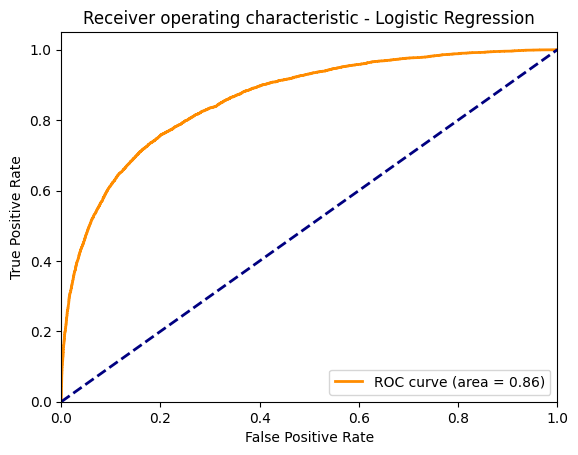

Cross-validation scores - Logistic Regression:  [0.84642433 0.8481825  0.84594084 0.85165487 0.84571429]
Mean cross-validation score - Logistic Regression:  0.8475833652523909
Confusion Matrix - Decision Tree:
[[19010  3088]
 [ 3041  3300]]


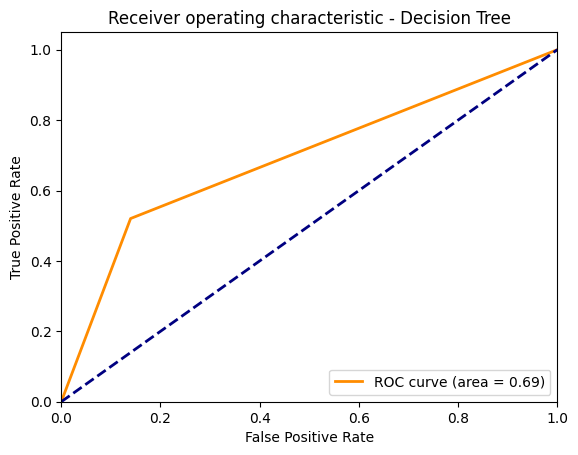

Cross-validation scores - Decision Tree:  [0.78545998 0.78335018 0.78581161 0.78699837 0.78461538]
Mean cross-validation score - Decision Tree:  0.7852471066360566


In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Definimos una lista con los modelos
models = [loaded_logistic_model, loaded_decision_tree_model]
model_names = ["Logistic Regression", "Decision Tree"]

# Definimos la función para visualizar la Curva ROC
def plot_roc_curve(fpr, tpr, model_name, roc_auc):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic - ' + model_name)
    plt.legend(loc="lower right")
    plt.show()

# Recorremos la lista de modelos para evaluarlos
for model, model_name in zip(models, model_names):
    # Matriz de Confusión
    pred = model.predict(X_test_df)
    cm = confusion_matrix(y_test, pred)
    print(f"Confusion Matrix - {model_name}:")
    print(cm)

    # Curva ROC y AUC
    probabilities = model.predict_proba(X_test_df)[:, 1]
    roc_auc = roc_auc_score(y_test, probabilities)
    fpr, tpr, _ = roc_curve(y_test, probabilities)
    plot_roc_curve(fpr, tpr, model_name, roc_auc)

    # Validación cruzada
    cv_scores = cross_val_score(model, X_train_df, y_train, cv=5)
    print(f"Cross-validation scores - {model_name}: ", cv_scores)
    print(f"Mean cross-validation score - {model_name}: ", np.mean(cv_scores))


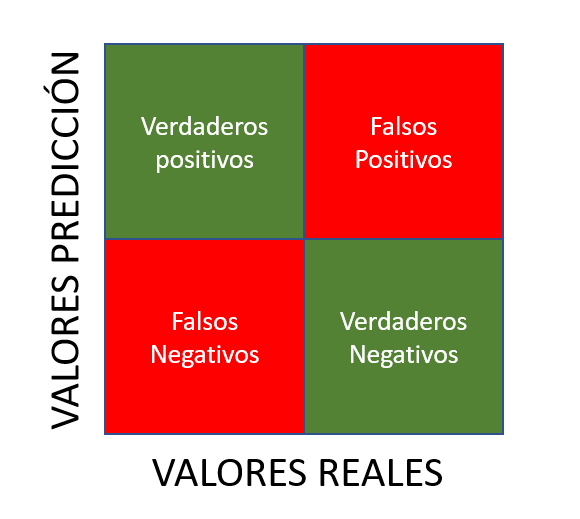

Interpretación:

1. **Regresión Logística**:
   - Matriz de confusión: De los días sin lluvia (clase 0), el modelo predijo correctamente 20,819 y predijo incorrectamente 1,279 como días de lluvia. De los días de lluvia (clase 1), el modelo predijo correctamente 3,192 y predijo incorrectamente 3,149 como días sin lluvia. Esto indica que el modelo tiene una mayor precisión para los días sin lluvia en comparación con los días de lluvia.
   - Validación cruzada: El puntaje de la validación cruzada es bastante consistente en todos los conjuntos de entrenamiento y validación, con una media de alrededor del 84.7%. Esto indica que el modelo tiene una buena generalización y es poco probable que esté sobreajustado.
   - Curva ROC: La curva ROC es una medida de qué tan bien el modelo puede distinguir entre las dos clases. Un área bajo la curva (AUC) de 0.86 indica un buen rendimiento del modelo en términos de especificidad y sensibilidad.

2. **Árbol de Decisión**:
   - Matriz de confusión: De los días sin lluvia (clase 0), el modelo predijo correctamente 19,010 y predijo incorrectamente 3,088 como días de lluvia. De los días de lluvia (clase 1), el modelo predijo correctamente 3,300 y predijo incorrectamente 3,041 como días sin lluvia. En comparación con la regresión logística, este modelo tiene un rendimiento inferior en la predicción de ambas clases.
   - Validación cruzada: El puntaje de la validación cruzada es bastante consistente en todos los conjuntos de entrenamiento y validación, con una media de alrededor del 78.5%. Esto indica que el modelo también tiene una buena generalización, aunque su rendimiento es inferior al de la regresión logística.
   - Curva ROC: El AUC del modelo de árbol de decisión es 0.69, lo que es significativamente más bajo que el de la regresión logística. Esto indica que el árbol de decisión tiene más dificultades para distinguir entre días de lluvia y días sin lluvia.

En conclusión, basándose en estos resultados, la Regresión Logística parece tener un rendimiento generalmente mejor en este problema de clasificación en comparación con el Árbol de Decisión, con una mayor precisión, una mayor consistencia en la validación cruzada y una mejor capacidad para distinguir entre las dos clases.

### **Regresión:** Target: RainFall

RainFall: Cantidad de lluvia en el día en milímetros .

In [ ]:
# Creamos nuestros nuevos target a partir de 'Rainfall'
y2_train = X_train_df['Rainfall']
y2_test = X_test_df['Rainfall']

# Eliminamos la columna 'Rainfall' de los conjuntos de entrenamiento y prueba
X_train_df = X_train_df.drop(['Rainfall'], axis=1)
X_test_df = X_test_df.drop(['Rainfall'], axis=1)


Regresión Lineal, Árbol de Regresión y Regresor de Vector de Soporte (SVR) y evaluacion de Error Cuadrado Medio Raíz (RMSE) para cada uno. (2 horas)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Definimos los modelos de regresión
linear_regression_model = LinearRegression()
decision_tree_regression_model = DecisionTreeRegressor()
svr_model = SVR()

# Entrenamos los modelos de regresión
linear_regression_model.fit(X_train_df, y2_train)
decision_tree_regression_model.fit(X_train_df, y2_train)
svr_model.fit(X_train_df, y2_train)

# Predecimos con los modelos de regresión
linear_regression_pred = linear_regression_model.predict(X_test_df)
decision_tree_regression_pred = decision_tree_regression_model.predict(X_test_df)
svr_pred = svr_model.predict(X_test_df)

# Evaluamos los modelos de regresión
print("Linear Regression RMSE: ", np.sqrt(mean_squared_error(y2_test, linear_regression_pred)))
print("Decision Tree Regression RMSE: ", np.sqrt(mean_squared_error(y2_test, decision_tree_regression_pred)))
print("SVR RMSE: ", np.sqrt(mean_squared_error(y2_test, svr_pred)))


Interpretación:

Regresión Lineal: El RMSE es de 0.8397. Esto significa que, en promedio, las predicciones realizadas por el modelo de regresión lineal se desvían del valor real por 0.8397 unidades.

Árbol de Decisión: El RMSE es de 1.1113. Esto significa que las predicciones realizadas por el modelo de árbol de decisión se desvían del valor real por 1.1113 unidades en promedio. Esto es significativamente mayor que el RMSE de la regresión lineal.

Máquina de Vectores de Soporte (SVR): El RMSE es de 0.8373, lo que significa que las predicciones realizadas por el modelo SVR se desvían del valor real por 0.8373 unidades en promedio.

Conclusión:

De los tres modelos, el que tiene el menor RMSE y, por lo tanto, el mejor rendimiento en este conjunto de datos de prueba, es la Máquina de Vectores de Soporte (SVR). El modelo de regresión lineal también tiene un rendimiento comparable, con un RMSE ligeramente mayor. Por otro lado, el modelo de árbol de decisión tuvo el peor rendimiento de los tres, con el RMSE más alto.

Almacenamiento de los modelos en Google Drive

In [ ]:
import pickle

# Guardar los modelos
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(linear_regression_model, file)

with open('decision_tree_regression_model.pkl', 'wb') as file:
    pickle.dump(decision_tree_regression_model, file)

with open('svr_model.pkl', 'wb') as file:
    pickle.dump(svr_model, file)

Carga de los modelos desde Google Drive

In [ ]:
import pickle

# Cargar los modelos
with open('linear_regression_model.pkl', 'rb') as file:
    loaded_linear_regression_model = pickle.load(file)

with open('decision_tree_regression_model.pkl', 'rb') as file:
    loaded_decision_tree_regression_model = pickle.load(file)

with open('svr_model.pkl', 'rb') as file:
    loaded_svr_model = pickle.load(file)


Evaluación extendida de los modelos: Error Absoluto Medio, Error Cuadrado Medio, Error Cuadrado Medio Raíz, R cuadrado, Curvas de aprendizaje para Regresión Lineal y Regresión con Árbol de Decisión. No incluimos SVR porque también tarda demasiado en ser evaluado.

Evaluating Model: Loaded Linear Regression
Mean Absolute Error (MAE):  0.3270673778634908
Mean Squared Error (MSE):  0.7051983722378928
Root Mean Squared Error (RMSE):  0.8397609018273552
R2 Score:  0.28935827644210743


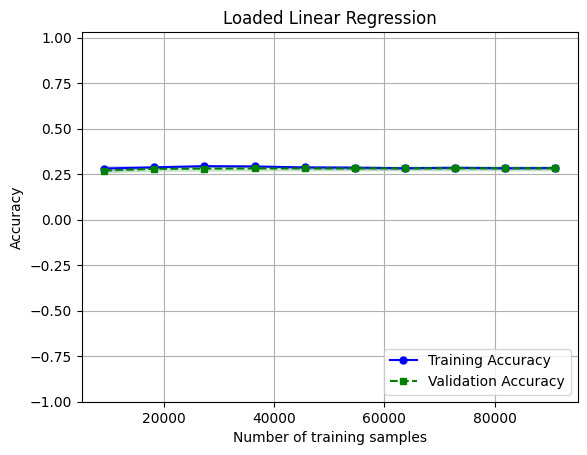

Evaluating Model: Loaded Decision Tree Regression
Mean Absolute Error (MAE):  0.28247804841764373
Mean Squared Error (MSE):  1.234983802407376
Root Mean Squared Error (RMSE):  1.111298250879293
R2 Score:  -0.24451651118218387


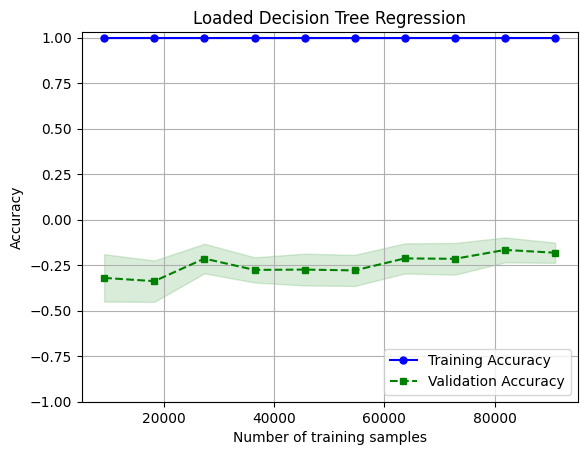

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import learning_curve

def plot_learning_curves(model, X_train, y_train, model_name):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=X_train,
                                                            y=y_train,
                                                            train_sizes=np.linspace(0.1, 1.0, 10),
                                                            cv=5,
                                                            n_jobs=-1)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim([-1, 1.03])  # Modificando el rango de y-limit
    plt.title(model_name)
    plt.show()

regressors = [loaded_linear_regression_model, loaded_decision_tree_regression_model]
regressor_names = ["Loaded Linear Regression", "Loaded Decision Tree Regression"]

for model, model_name in zip(regressors, regressor_names):
    print(f"Evaluating Model: {model_name}")

    predictions = model.predict(X_test_df)

    print("Mean Absolute Error (MAE): ", mean_absolute_error(y2_test, predictions))
    print("Mean Squared Error (MSE): ", mean_squared_error(y2_test, predictions))
    print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y2_test, predictions)))
    print("R2 Score: ", r2_score(y2_test, predictions))

    plot_learning_curves(model, X_train_df, y2_train, model_name)


Interpretación de las métricas:

Modelo de regresión lineal:
MAE: 0.327, lo que significa que el modelo predice, en promedio, a 0.327 unidades de distancia del valor verdadero.
MSE: 0.705, una medida que penaliza más los errores grandes que el MAE.
RMSE: 0.840, que es la raíz cuadrada del MSE y está en las mismas unidades que la variable objetivo.
R^2 Score: 0.289, lo que indica que el modelo explica aproximadamente el 28.9% de la variabilidad en los datos.
Modelo de árbol de decisión:
MAE: 0.282, lo que significa que el modelo predice, en promedio, a 0.282 unidades de distancia del valor verdadero.
MSE: 1.235, que es significativamente mayor que para el modelo de regresión lineal.
RMSE: 1.111, que también es considerablemente mayor que en el modelo de regresión lineal.
R^2 Score: -0.245, que es un valor negativo, sugiriendo que el modelo de árbol de decisión tiene un pobre rendimiento en este conjunto de datos y podría ser incluso peor que un modelo que simplemente predice la media de los datos.

Conclusión:

El modelo de regresión lineal muestra un rendimiento significativamente mejor que el modelo de árbol de decisión en este conjunto de datos, según todas las métricas de rendimiento utilizadas. Sin embargo, tanto el RMSE como el R^2 Score sugieren que hay margen para mejorar el rendimiento del modelo de regresión lineal. Podría ser útil probar otros modelos de regresión, ajustar los hiperparámetros de los modelos existentes o hacer ingeniería de características para intentar mejorar estas métricas.

Siglas:

Error Cuadrado Medio (MSE): Es una métrica de evaluación de modelos de regresión que mide la media de los cuadrados de los errores, es decir, la media de las diferencias al cuadrado entre los valores reales y los predichos.

Error Cuadrado Medio Raíz (RMSE): Es una métrica de evaluación de modelos de regresión que es la raíz cuadrada del MSE. Tiene la misma unidad que la variable objetivo.

Error Absoluto Medio (MAE): Es una métrica de evaluación de modelos de regresión que mide la media de las diferencias absolutas entre los valores reales y los predichos.

R cuadrado (R2 Score): Es una métrica de evaluación de modelos de regresión que mide la proporción de la varianza de la variable objetivo que se puede predecir a partir de las características. Un valor de 1 indica una predicción perfecta.


## Conclusión

En este proyecto de minería de datos, exploramos el conjunto de datos meteorológicos de Australia con el objetivo de predecir si lloverá mañana ('RainTomorrow') y cuánta lluvia caerá ('Rainfall'). Para ello, utilizamos varios modelos de clasificación y regresión, incluyendo Regresión Logística, Árbol de Decisión, SVM, Regresión Lineal, Árbol de Regresión y SVR.

Los modelos de clasificación enfrentaron dificultades para predecir correctamente los días de lluvia, probablemente debido a un desequilibrio en los datos. Entre ellos, el SVM demostró la mayor precisión y la puntuación F1, a pesar de tener un recall inferior para los días de lluvia. Por otro lado, el modelo de regresión SVR proporcionó el mejor rendimiento para predecir 'Rainfall', con el menor RMSE (Error Cuadrado Medio Raíz).

Sin embargo, durante las evaluaciones extendidas, los modelos SVM y SVR presentaron desafíos en términos de eficiencia computacional, tardando horas en ser evaluados debido a su naturaleza computacionalmente intensiva. Esto subraya la importancia de considerar no sólo la precisión, sino también la eficiencia y escalabilidad al seleccionar el algoritmo de Machine Learning más adecuado.

Este proyecto demostró la utilidad y los desafíos de la minería de datos y el Machine Learning en la predicción meteorológica. Los resultados resaltan la necesidad de abordar el desequilibrio de clases, optimizar el rendimiento del modelo y equilibrar las demandas de precisión y eficiencia computacional. Para futuras investigaciones, se recomienda explorar técnicas más eficientes, balancear las clases y experimentar con otros algoritmos.

# Parte 3: Visualizaciones

## Codigo inicial

In [ ]:
#Importamos librerias
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [ ]:
#Cargamos el dataset desde Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# cargar archivosdesde drive csv
X_train_df = pd.read_csv('/content/drive/MyDrive/X_train_data_KNNIMPUTER.csv')
X_test_df = pd.read_csv('/content/drive/MyDrive/X_test_data_KNNIMPUTER.csv')
y_train = np.load('/content/drive/MyDrive/y_train.npy')
y_test = np.load('/content/drive/MyDrive/y_test.npy')

In [ ]:
# Crear DataFrames a partir de los conjuntos de datos imputados
#imputed_df_train = pd.DataFrame(X_train_df, columns=X_train.columns)
#imputed_df_test = pd.DataFrame(X_test_df, columns=X_test.columns)
imputed_df_train = X_train_df
imputed_df_test = X_test_df
combined_df = pd.concat([imputed_df_train, imputed_df_test], ignore_index=True)


In [ ]:
#Cargamos el dataset desde Google Drive
drive.mount('/content/drive')
df = pd.read_csv(r'/content/drive/MyDrive/weatherAUS.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Mapear los valores de las columnas "RainTomorrow" y "RainToday" a valores numéricos
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

df['RainBubbleSize'] = df['RainTomorrow'].map({0:1,1:50})


In [ ]:
# 1. Estructura de datos
print("Estructura de datos:")
print("Número de filas:", df.shape[0])
print("Número de columnas:", df.shape[1])
print()

# 2. Variables/Características
print("Variables/Características:")
print(df.dtypes)
print()

# 3. Muestra de datos
print("Muestra de datos:")
print(df.head())  # Muestra los primeros registros, puedes ajustar la cantidad con head(n) donde n es el número de registros a mostrar
print()

# Verificar las columnas con valores nulos
columnas_con_nulos = df.columns[df.isnull().any()].tolist()
print("Columnas con valores nulos:")
print(columnas_con_nulos)

Estructura de datos:
Número de filas: 142193
Número de columnas: 25

Variables/Características:
Date               object
Location           object
MinTemp           float64
MaxTemp           float64
Rainfall          float64
Evaporation       float64
Sunshine          float64
WindGustDir        object
WindGustSpeed     float64
WindDir9am         object
WindDir3pm         object
WindSpeed9am      float64
WindSpeed3pm      float64
Humidity9am       float64
Humidity3pm       float64
Pressure9am       float64
Pressure3pm       float64
Cloud9am          float64
Cloud3pm          float64
Temp9am           float64
Temp3pm           float64
RainToday         float64
RISK_MM           float64
RainTomorrow        int64
RainBubbleSize      int64
dtype: object

Muestra de datos:
         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN    

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Transformando la columna 'Date' a datetime
df['Date'] = pd.to_datetime(df['Date'])

# Asegurándonos de que los datos estén ordenados por fecha
df = df.sort_values('Date')


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

In [ ]:
# Configurar estilo dark mode
plt.style.use('dark_background')


# 🌧️ (Tamar) Gráfico de barras de la cantidad de días de lluvia y no lluvia

## Distribución de dias lluviosos y no lluviosos

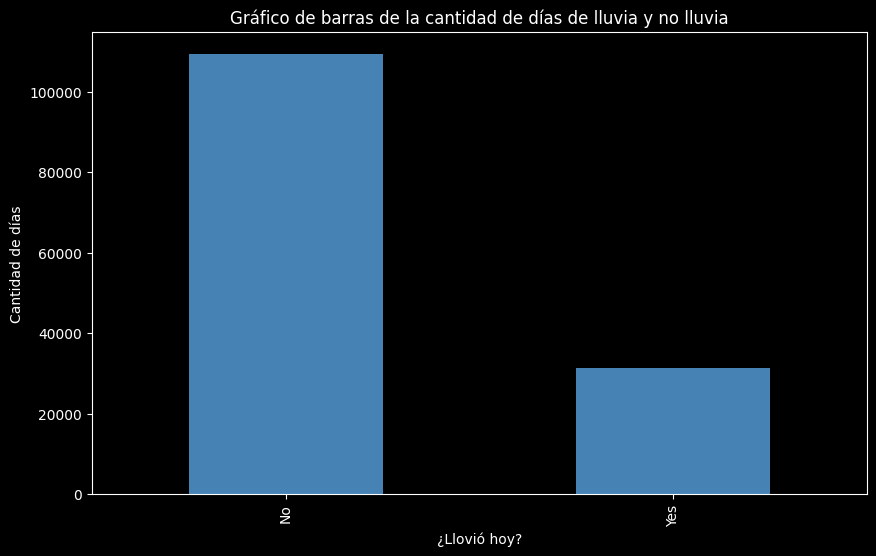

In [ ]:
plt.figure(figsize=(10, 6))
df['RainToday'].value_counts().plot(kind='bar', color='steelblue')
plt.title('Gráfico de barras de la cantidad de días de lluvia y no lluvia')
plt.xlabel('¿Llovió hoy?')
plt.ylabel('Cantidad de días')
plt.show()


El gráfico de barras muestra la cantidad de días en los que llovió y no llovió. Esto puede dar una idea del balance entre días de lluvia y no lluvia en el conjunto de datos.


## Top 10 ubicaciones con más registro


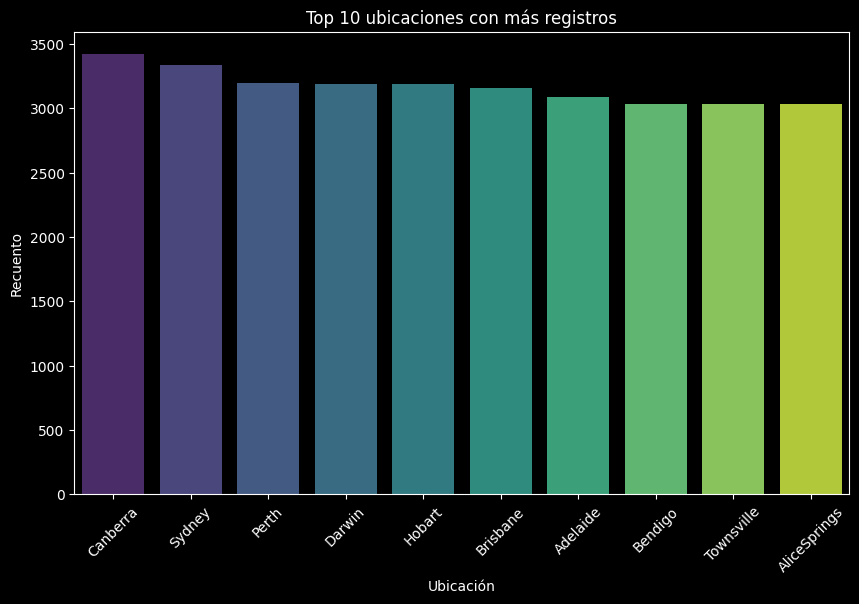

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtenemos las 10 ubicaciones superiores
top_locations = df['Location'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')
plt.title('Top 10 ubicaciones con más registros')
plt.xlabel('Ubicación')
plt.ylabel('Recuento')
plt.xticks(rotation=45)
plt.show()


Aqui podemos ver el top 10 del mayor recuento de datos por ubicación.

## Top 10 ubicaciones con mayor precipitación

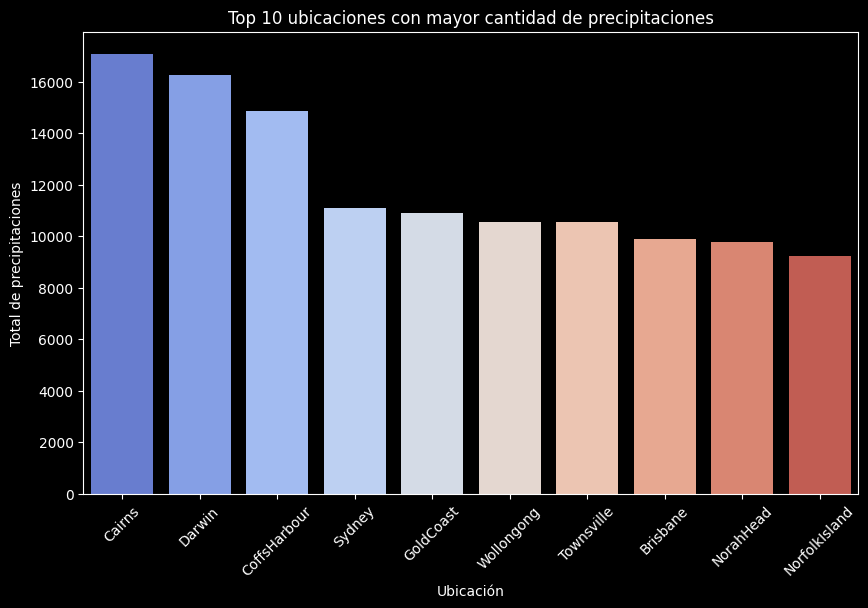

In [ ]:
# Agrupamos por ubicación y sumamos la cantidad de precipitaciones, luego ordenamos en orden descendente
locations_rainfall = df.groupby('Location')['Rainfall'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=locations_rainfall.index, y=locations_rainfall.values, palette='coolwarm')
plt.title('Top 10 ubicaciones con mayor cantidad de precipitaciones')
plt.xlabel('Ubicación')
plt.ylabel('Total de precipitaciones')
plt.xticks(rotation=45)
plt.show()


Estas son las ubicaciones con mayores precipitaciones, que suelen ser lugares mas tropicales o con mayor humedad.

## Top 10 ubicaciones con menor precipitación

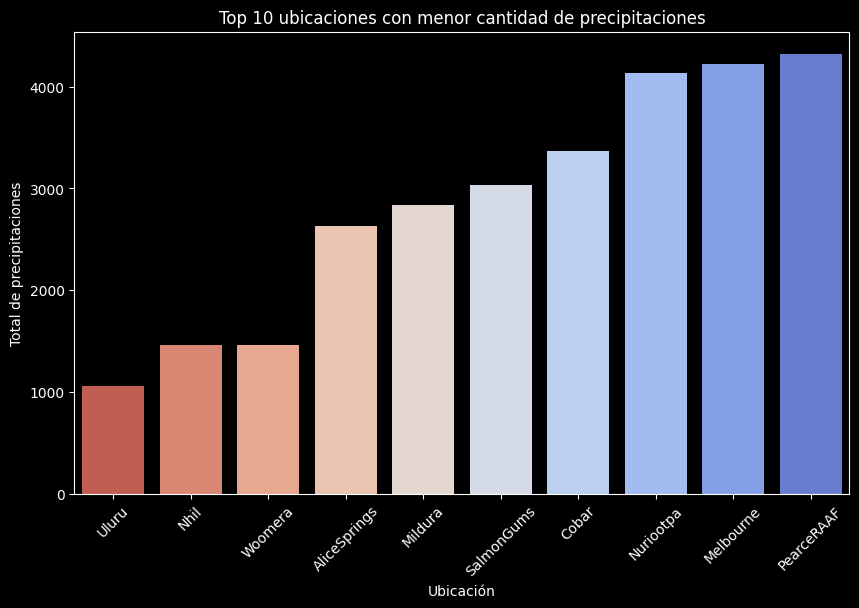

In [ ]:
# Agrupamos por ubicación y sumamos la cantidad de precipitaciones, luego ordenamos en orden descendente
locations_rainfall = df.groupby('Location')['Rainfall'].sum().sort_values(ascending=True).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=locations_rainfall.index, y=locations_rainfall.values, palette='coolwarm_r')
plt.title('Top 10 ubicaciones con menor cantidad de precipitaciones')
plt.xlabel('Ubicación')
plt.ylabel('Total de precipitaciones')
plt.xticks(rotation=45)
plt.show()


Estas son las ubicaciones con menores precipitaciones, los cuales son lugares muy aridos o sea deserticos.

## Top 10 ubicaciones con mayor temperatura

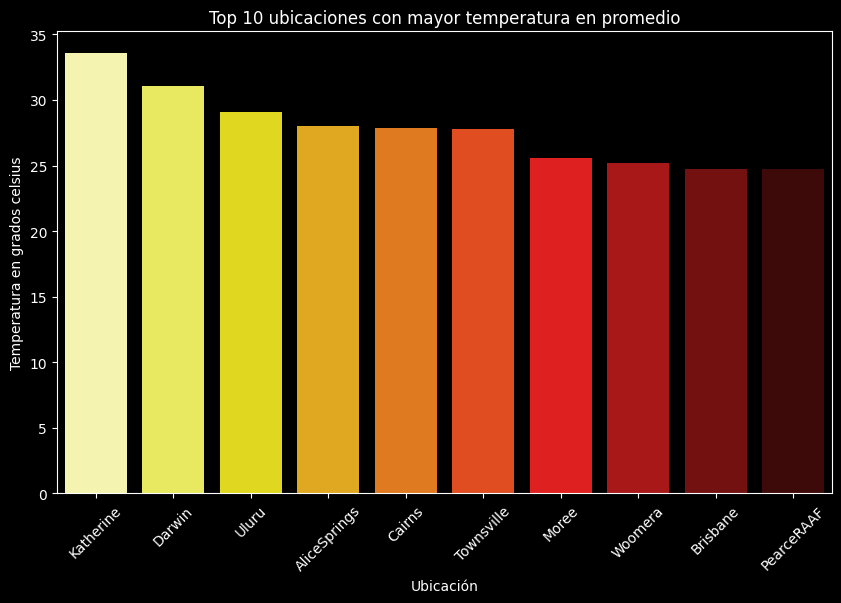

In [ ]:
# Agrupamos por ubicación y sumamos la cantidad de precipitaciones, luego ordenamos en orden descendente
locations_rainfall = df.groupby('Location')['Temp3pm'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=locations_rainfall.index, y=locations_rainfall.values, palette='hot_r')
plt.title('Top 10 ubicaciones con mayor temperatura en promedio')
plt.xlabel('Ubicación')
plt.ylabel('Temperatura en grados celsius')
plt.xticks(rotation=45)
plt.show()


Aquí se pueden apreciar el top 10 de ubicaciones con mayor temperatura promedio.

## Top 10 ubicaciones con menor temperatura

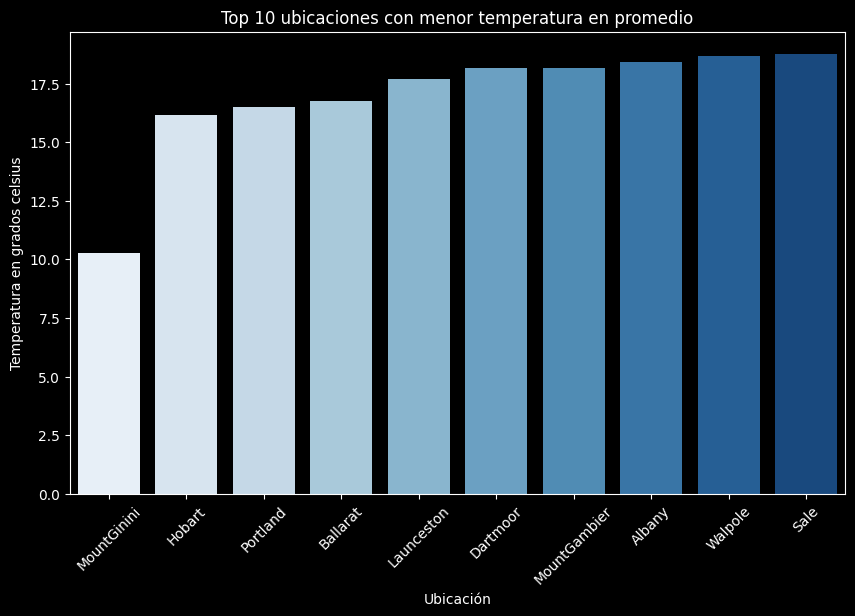

In [ ]:
# Agrupamos por ubicación y sumamos la cantidad de precipitaciones, luego ordenamos en orden descendente
locations_rainfall = df.groupby('Location')['Temp3pm'].mean().sort_values(ascending=True).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=locations_rainfall.index, y=locations_rainfall.values, palette='Blues')
plt.title('Top 10 ubicaciones con menor temperatura en promedio')
plt.xlabel('Ubicación')
plt.ylabel('Temperatura en grados celsius')
plt.xticks(rotation=45)
plt.show()


Aquí se pueden apreciar el top 10 de ubicaciones con menor temperatura promedio.

## Gráfico de barras de la dirección del viento más frecuente a las 3 pm

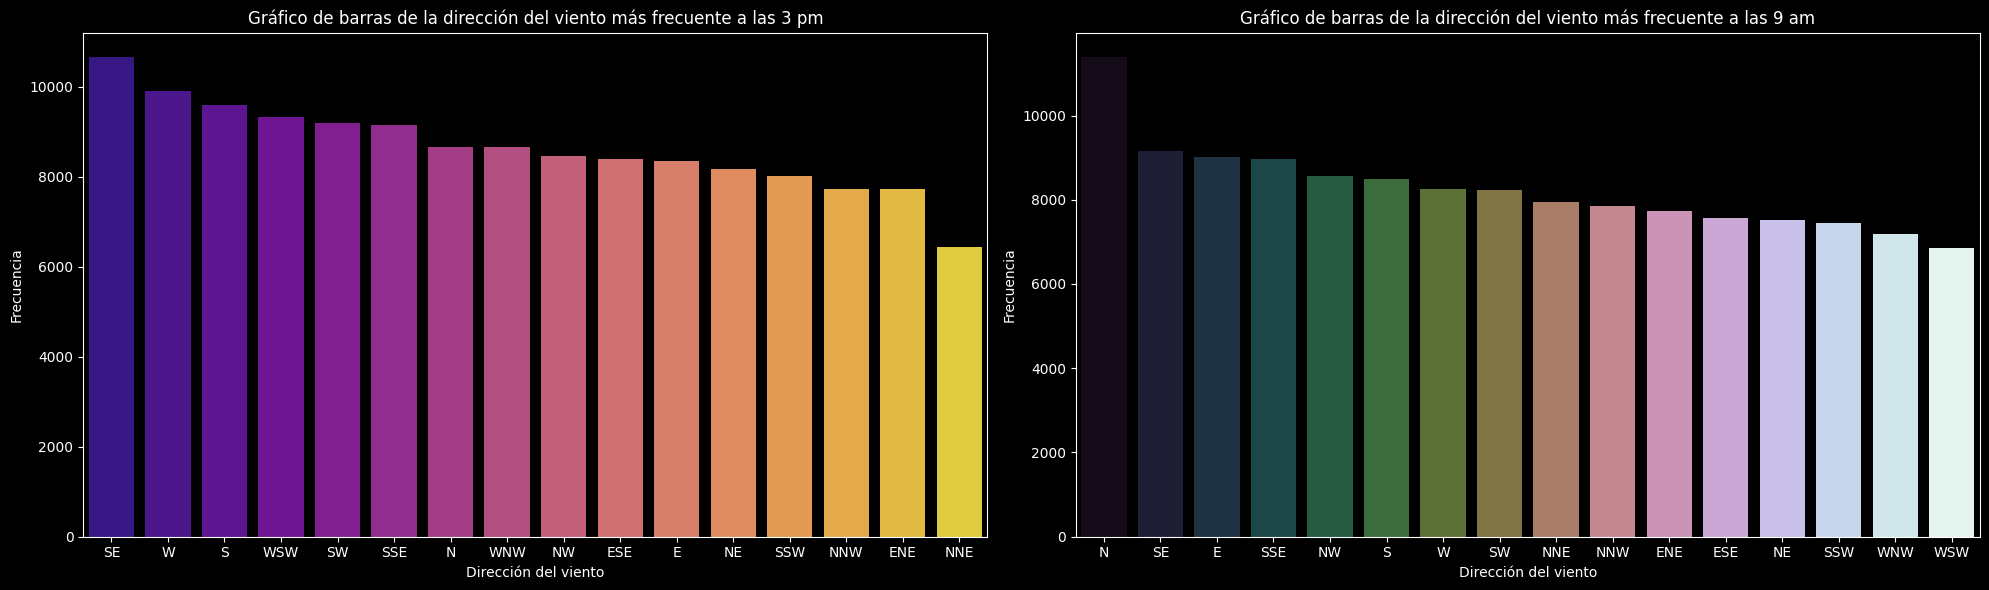

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# Calculamos la frecuencia de cada dirección del viento a las 3pm
wind_dir_freq_3pm = df['WindDir3pm'].value_counts()

# Gráfico para la dirección del viento a las 3 pm
sns.barplot(x=wind_dir_freq_3pm.index, y=wind_dir_freq_3pm.values, palette='plasma', ax=ax[0])
ax[0].set_title('Gráfico de barras de la dirección del viento más frecuente a las 3 pm')
ax[0].set_xlabel('Dirección del viento')
ax[0].set_ylabel('Frecuencia')

# Calculamos la frecuencia de cada dirección del viento a las 9am
wind_dir_freq_9am = df['WindDir9am'].value_counts()

# Gráfico para la dirección del viento a las 9 am
sns.barplot(x=wind_dir_freq_9am.index, y=wind_dir_freq_9am.values, palette='cubehelix', ax=ax[1])
ax[1].set_title('Gráfico de barras de la dirección del viento más frecuente a las 9 am')
ax[1].set_xlabel('Dirección del viento')
ax[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


La dirección de viento mas frecuente a las 3pm en comparación a las 9am.

N: Norte

NNE: Norte-Noreste

NE: Noreste

ENE: Este-Noreste

E: Este

ESE: Este-Sureste

SE: Sureste

SSE: Sur-Sureste

S: Sur

SSW: Sur-Suroeste

SW: Suroeste

WSW: Oeste-Suroeste

W: Oeste

WNW: Oeste-Noroeste

NW: Noroeste

NNW: Norte-Noroeste

# 🌧️ (Daniel) Gráfico de línea de la probabilidad de lluvia en porcentaje a lo largo de los años

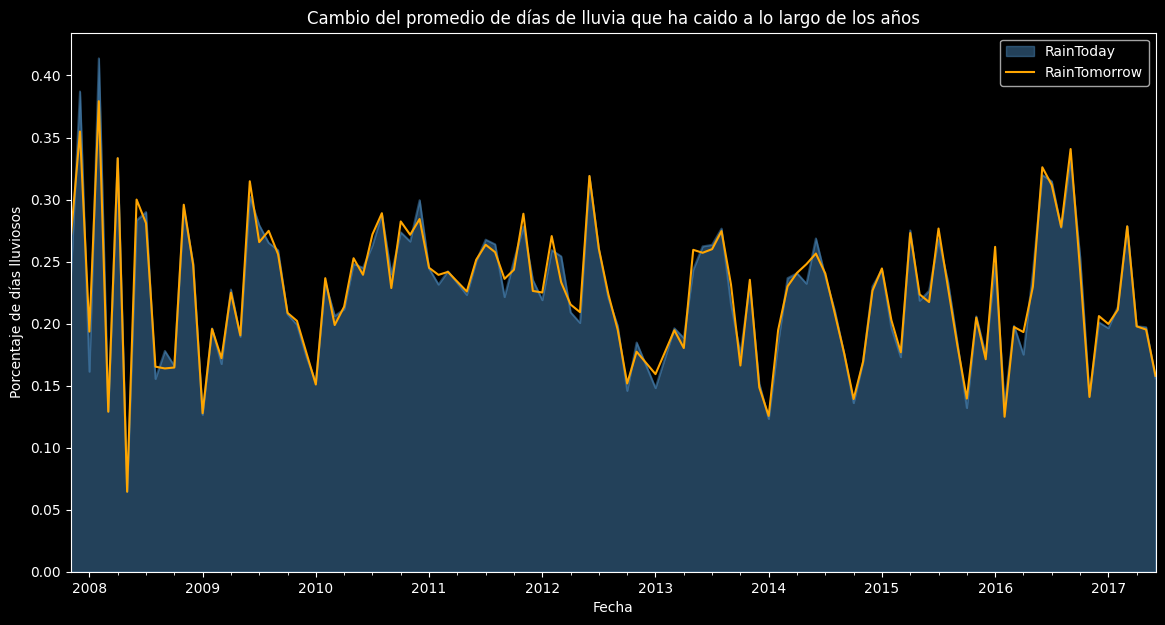

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month-Year'] = df['Date'].dt.to_period('M')
monthly_avg_pressure = df.groupby('Month-Year')[['RainToday', 'RainTomorrow']].mean()
plt.figure(figsize=(14, 7))
monthly_avg_pressure['RainToday'].plot(kind='area', color='steelblue',alpha=0.5, ax=plt.gca())
monthly_avg_pressure['RainTomorrow'].plot(kind='line', color='orange', alpha=1.0, ax=plt.gca())
plt.title('Cambio del promedio de días de lluvia que ha caido a lo largo de los años')
plt.ylabel('Porcentaje de días lluviosos')
plt.xlabel('Fecha')
plt.legend()
plt.show()

Aqui se puede ver el cambio del porcentaje de días lluviosos por mes y año a lo largo de los años. 🌧️

## Temperatura mínima y máxima en las diferentes ubicaciones

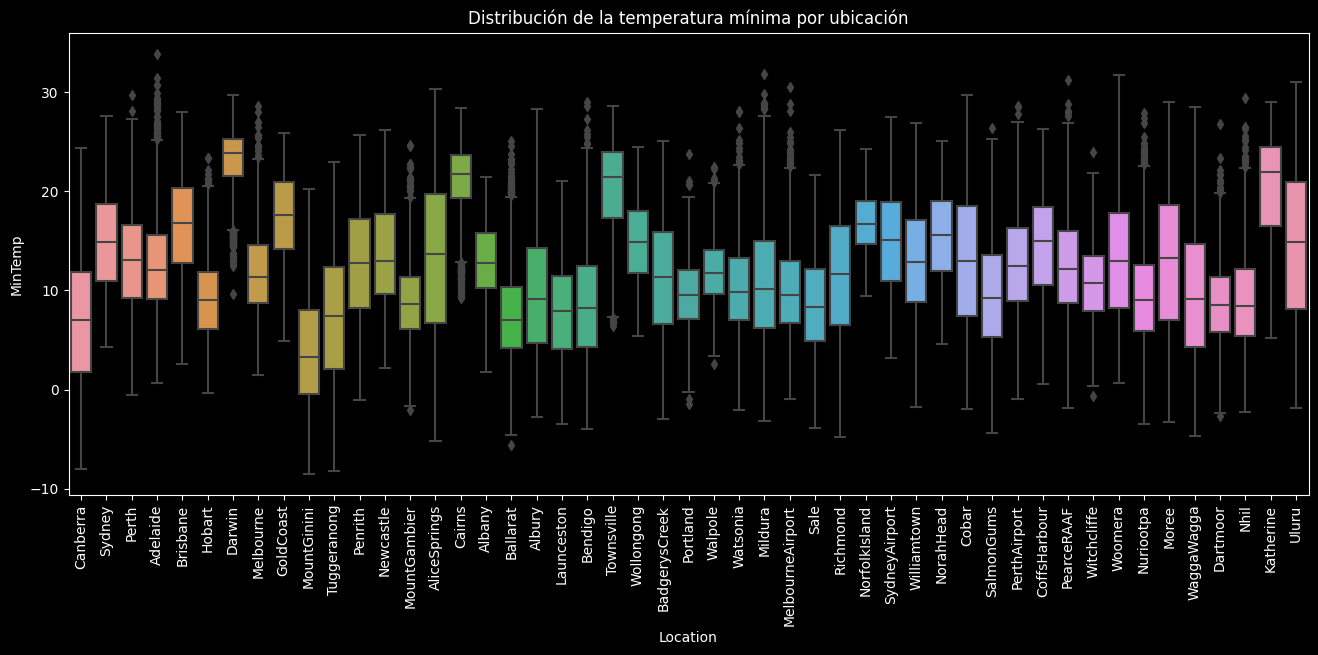

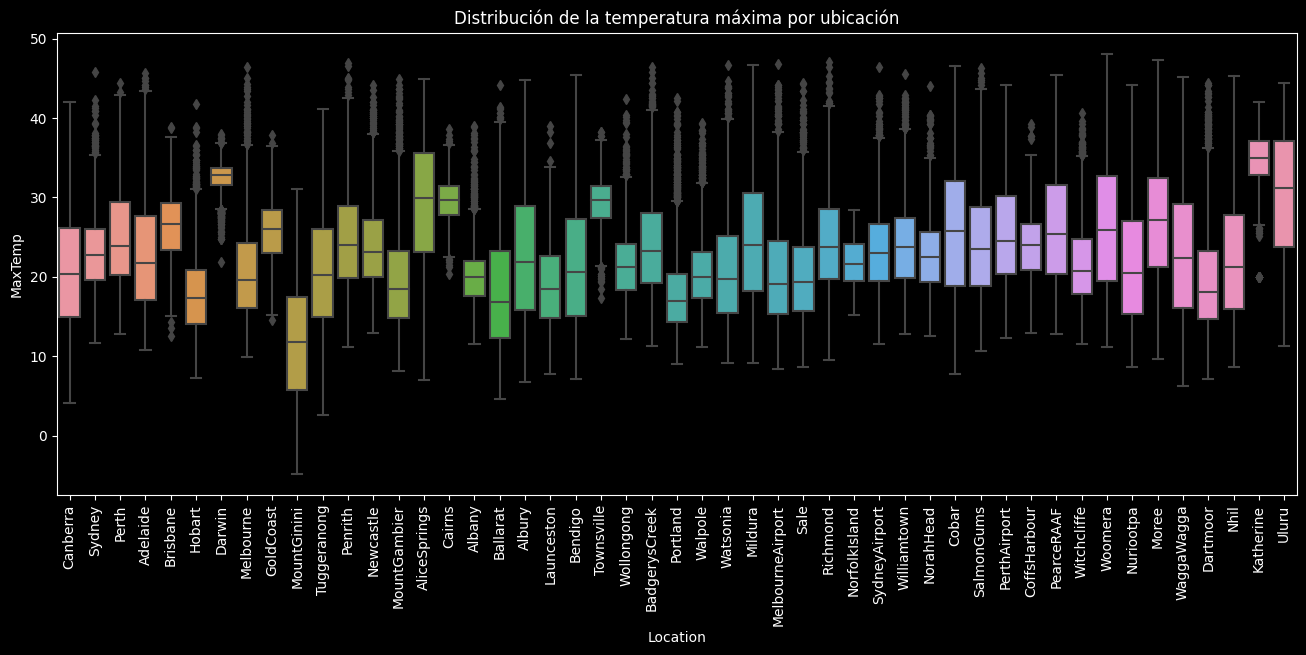

In [ ]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=df, x='Location', y='MinTemp')
plt.title('Distribución de la temperatura mínima por ubicación')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(16, 6))
sns.boxplot(data=df, x='Location', y='MaxTemp')
plt.title('Distribución de la temperatura máxima por ubicación')
plt.xticks(rotation=90)
plt.show()


Estos gráficos de caja muestran la distribución de las temperaturas mínimas y máximas en cada ubicación. La línea en medio de cada caja indica la mediana, mientras que la caja en sí representa el rango intercuartil (IQR, por sus siglas en inglés). Los puntos fuera de las "antenas" son considerados valores atípicos.

## Comparación de la (velocidad del viento/presión atmosférica) a las 9am y a las 3pm


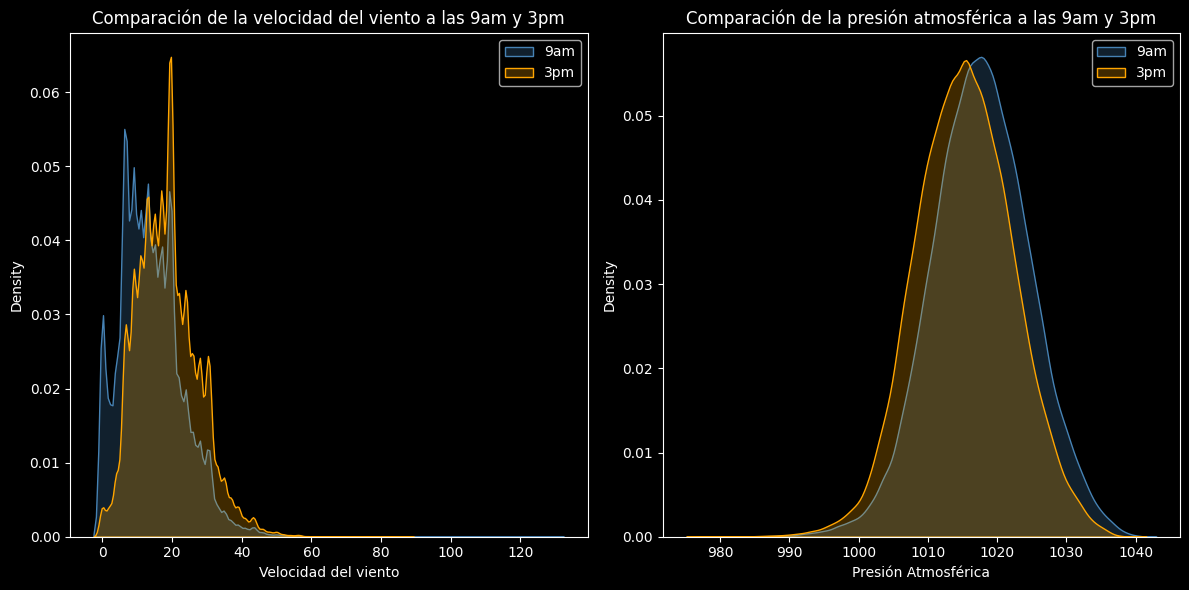

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de velocidad del viento
sns.kdeplot(df['WindSpeed9am'], fill=True, label='9am', color='steelblue', ax=axes[0])
sns.kdeplot(df['WindSpeed3pm'], fill=True, label='3pm', color='orange', ax=axes[0])
axes[0].set_title('Comparación de la velocidad del viento a las 9am y 3pm')
axes[0].set_xlabel('Velocidad del viento')
axes[0].legend()

# Gráfico de presión atmosférica
sns.kdeplot(df['Pressure9am'], fill=True, label='9am', color='steelblue', ax=axes[1])
sns.kdeplot(df['Pressure3pm'], fill=True, label='3pm', color='orange', ax=axes[1])
axes[1].set_title('Comparación de la presión atmosférica a las 9am y 3pm')
axes[1].set_xlabel('Presión Atmosférica')
axes[1].legend()

# Ajustar los subplots y mostrar el gráfico
plt.tight_layout()
plt.show()


Cuadro comparativo de velocidad del viento y la presión atmosférica entre 9am y 3pm.

## Histograma comparación relativa entre presión atmosférica y temperatura mínima

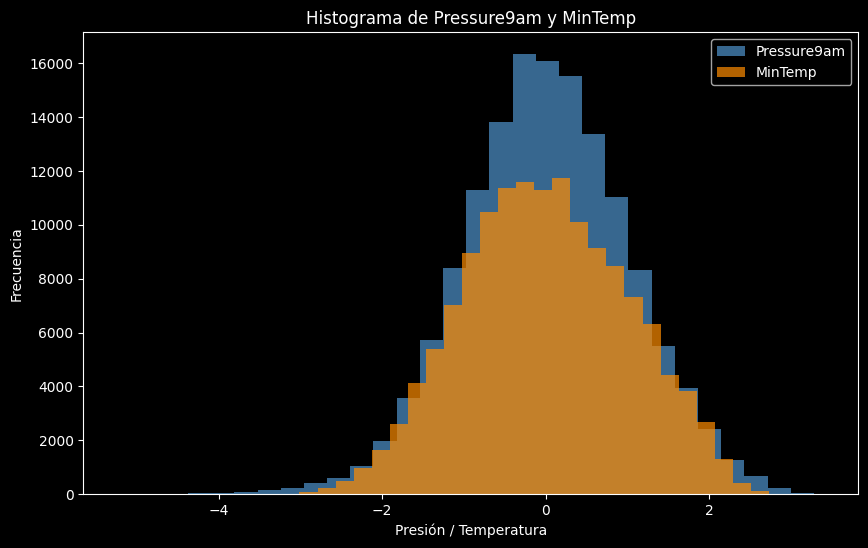

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Estadística descriptiva
statistics = combined_df.describe()

# Configurar estilo dark mode
plt.style.use('dark_background')

# Gráfico de histograma con dos columnas
plt.figure(figsize=(10, 6))
plt.hist(combined_df['Pressure9am'].dropna(), bins=30, color='steelblue', alpha=0.8, label='Pressure9am')
plt.hist(combined_df['MinTemp'].dropna(), bins=30, color='darkorange', alpha=0.7, label='MinTemp')
plt.title('Histograma de Pressure9am y MinTemp')
plt.xlabel('Presión / Temperatura')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Imprimir estadística descriptiva
#print("Estadística descriptiva:")
#print(statistics)

Aqui se puede ver que la data procesada de la presión a las 9 am y la temperatura mínima tienen una buena distribución y leve correlación relativa.

## Correlación de características numéricas con mapa de calor


In [ ]:
"""
plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Mapa de calor de correlación de características numéricas')
plt.show()
"""

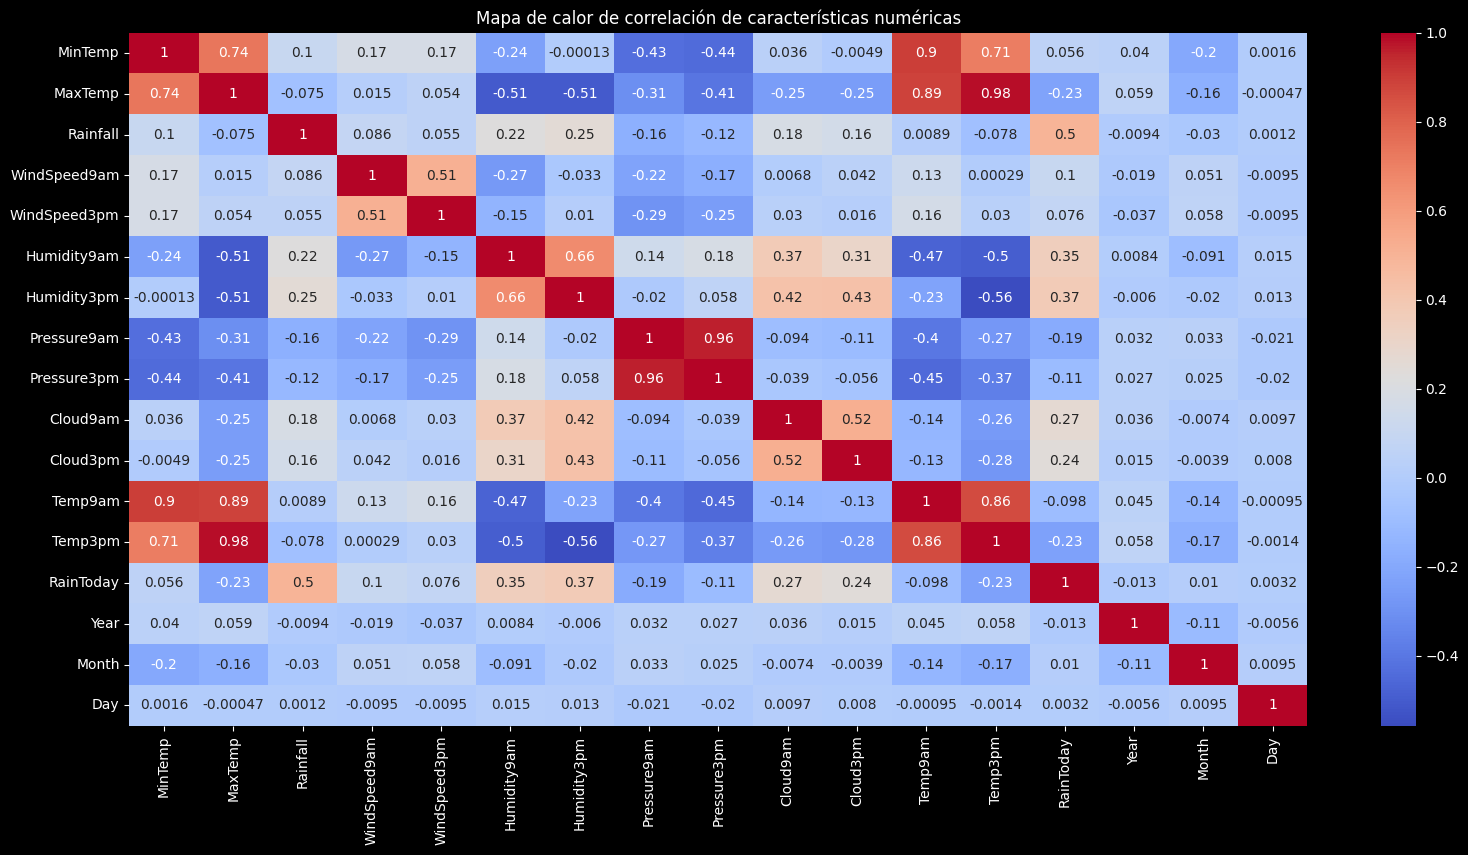

In [ ]:
# Crea una lista de las columnas a ignorar
cols_to_ignore = [col for col in combined_df.columns if col.startswith(('Location_', 'WindDir', 'WindGust'))]

# Crea un DataFrame sin las columnas a ignorar
df_filtered = combined_df.select_dtypes(include=[np.number]).drop(columns=cols_to_ignore)

# Calcula la correlación en el DataFrame filtrado
corr = df_filtered.corr()

# Crea el mapa de calor
plt.figure(figsize=(19, 9))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Mapa de calor de correlación de características numéricas')
plt.show()



Este mapa de calor muestra la correlación entre las características numéricas en los datos. Los colores más cálidos indican una correlación positiva, mientras que los colores más fríos indican una correlación negativa. La intensidad del color indica la fuerza de la correlación.

## Scatterplot Matrix (Pairplot) para seleccionar variables y buscar patrones

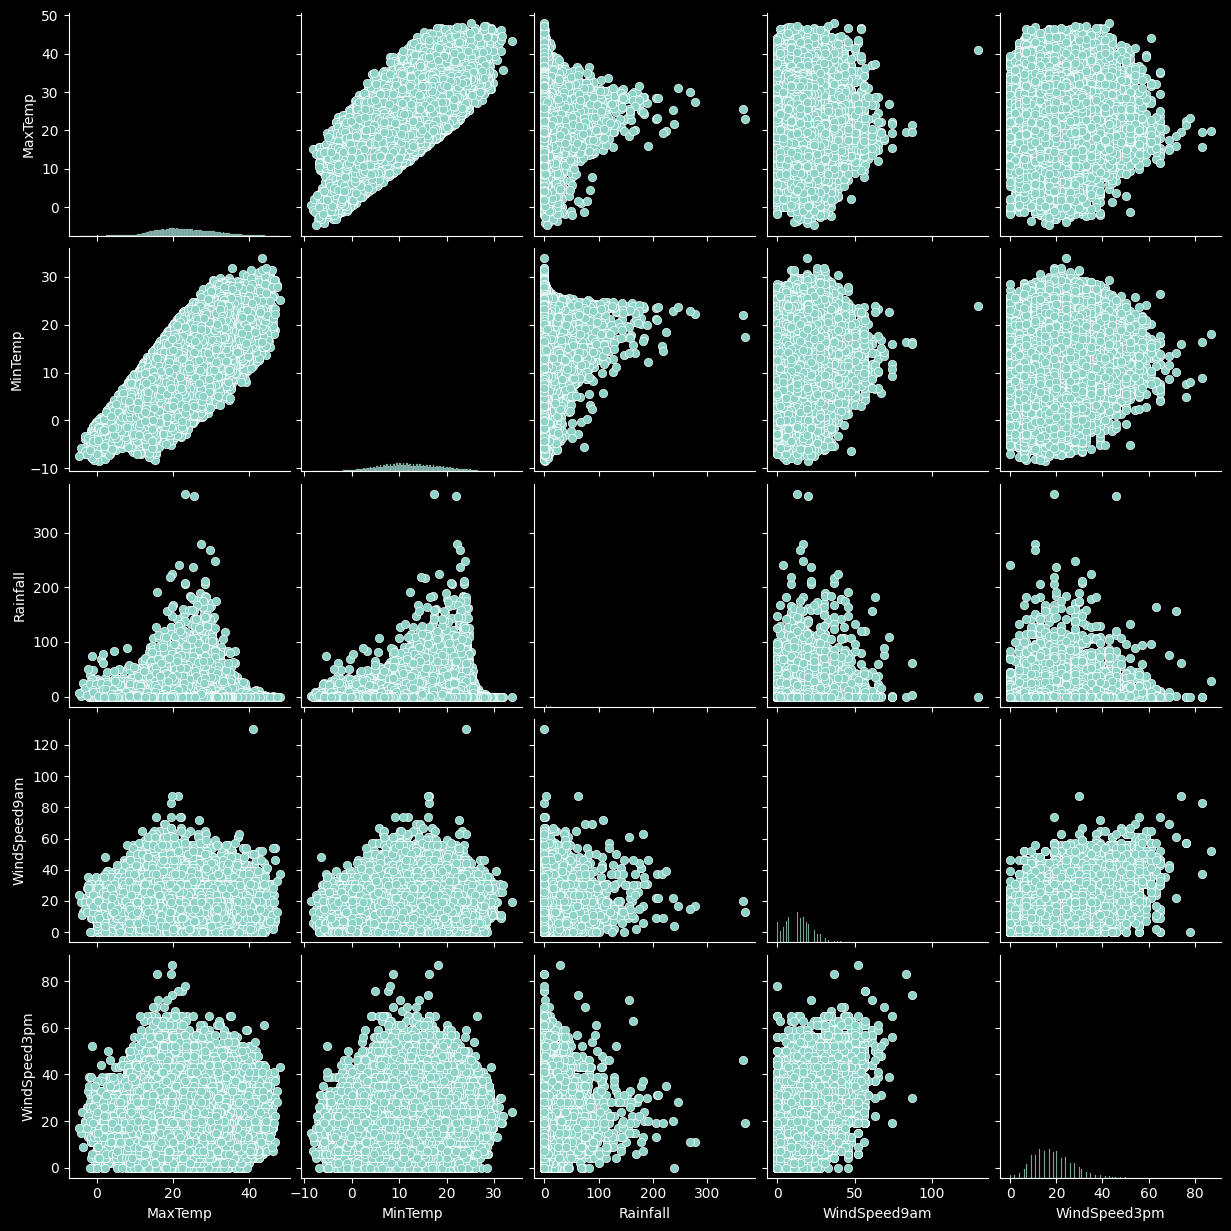

In [ ]:
selected_vars = ['MaxTemp', 'MinTemp', 'Rainfall', 'WindSpeed9am', 'WindSpeed3pm']
sns.pairplot(df[selected_vars])
plt.show()


El pairplot genera una matriz de gráficos de dispersión entre todas las combinaciones de pares de las variables seleccionadas, lo cual es útil para identificar patrones y relaciones entre múltiples variables simultáneamente.

## Cambio de la temperatura máxima a lo largo del año


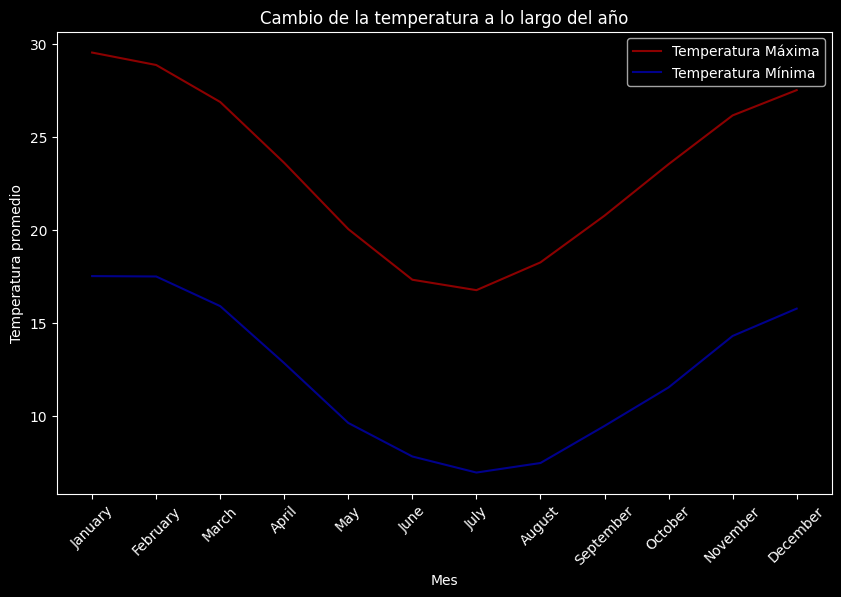

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Mapeamos los números del mes a los nombres de los meses
df['Month'] = df['Date'].dt.month_name()

# Ordenamos los meses
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Calculamos la temperatura máxima promedio para cada mes
monthly_max_temp = df.groupby('Month')['MaxTemp'].mean().sort_index()

# Calculamos la temperatura mínima promedio para cada mes
monthly_min_temp = df.groupby('Month')['MinTemp'].mean().sort_index()

# Creamos el gráfico
plt.figure(figsize=(10, 6))
monthly_max_temp.plot(kind='line', color='darkred', label='Temperatura Máxima')
monthly_min_temp.plot(kind='line', color='darkblue', label='Temperatura Mínima')
plt.title('Cambio de la temperatura a lo largo del año')
plt.xlabel('Mes')
plt.ylabel('Temperatura promedio')
plt.legend()

# Cambiamos los ticks del eje x para que muestren todos los meses
plt.xticks(np.arange(12), month_order, rotation=45)

plt.show()



Este gráfico de líneas muestra cómo cambia la temperatura mínima y máxima promedio a lo largo del año. Puedes ver en qué meses la temperatura tiende a ser más alta o más baja.



## Cambio de la temperatura mínima y máxima a lo largo de los años


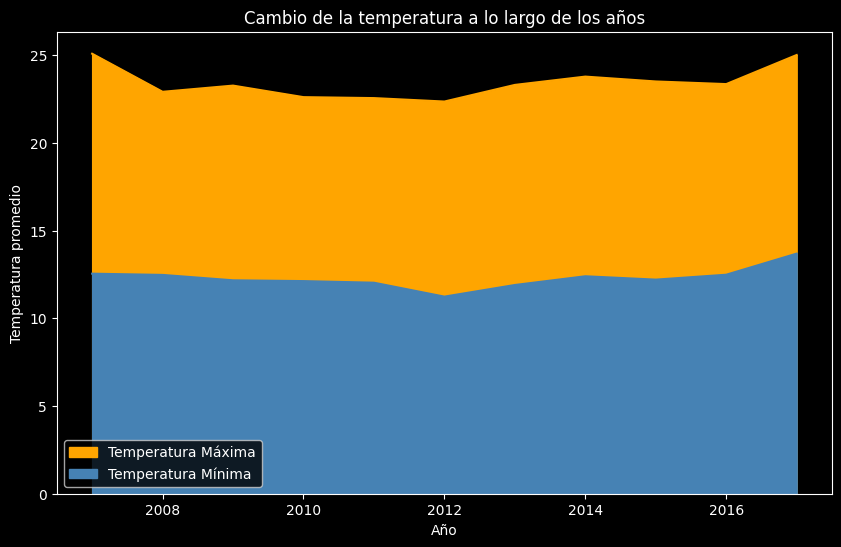

In [ ]:
# Creamos una nueva columna que contenga solo el año
df['Year'] = df['Date'].dt.year

# Luego, agrupamos por 'Year' y calculamos la temperatura máxima y mínima promedio
yearly_max_temp = df.groupby('Year')['MaxTemp'].mean()
yearly_min_temp = df.groupby('Year')['MinTemp'].mean()

# Creamos el gráfico
plt.figure(figsize=(10, 6))
yearly_max_temp.plot(kind='area', color='orange', label='Temperatura Máxima')
yearly_min_temp.plot(kind='area', color='steelblue', label='Temperatura Mínima')
plt.title('Cambio de la temperatura a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Temperatura promedio')
plt.legend()

plt.show()


Este gráfico de líneas muestra cómo cambia la temperatura mínima y máxima promedio a lo largo de los años. Puedes ver en qué años la temperatura tiende a ser más alta o más baja.


# 🌧️ (Bastian) Gráficos de burbuja (Patrones)

## Gráfico de burbujas de temperatura a las 3pm vs. presión a las 3pm (Tamaño de burbujas = Humedad %)

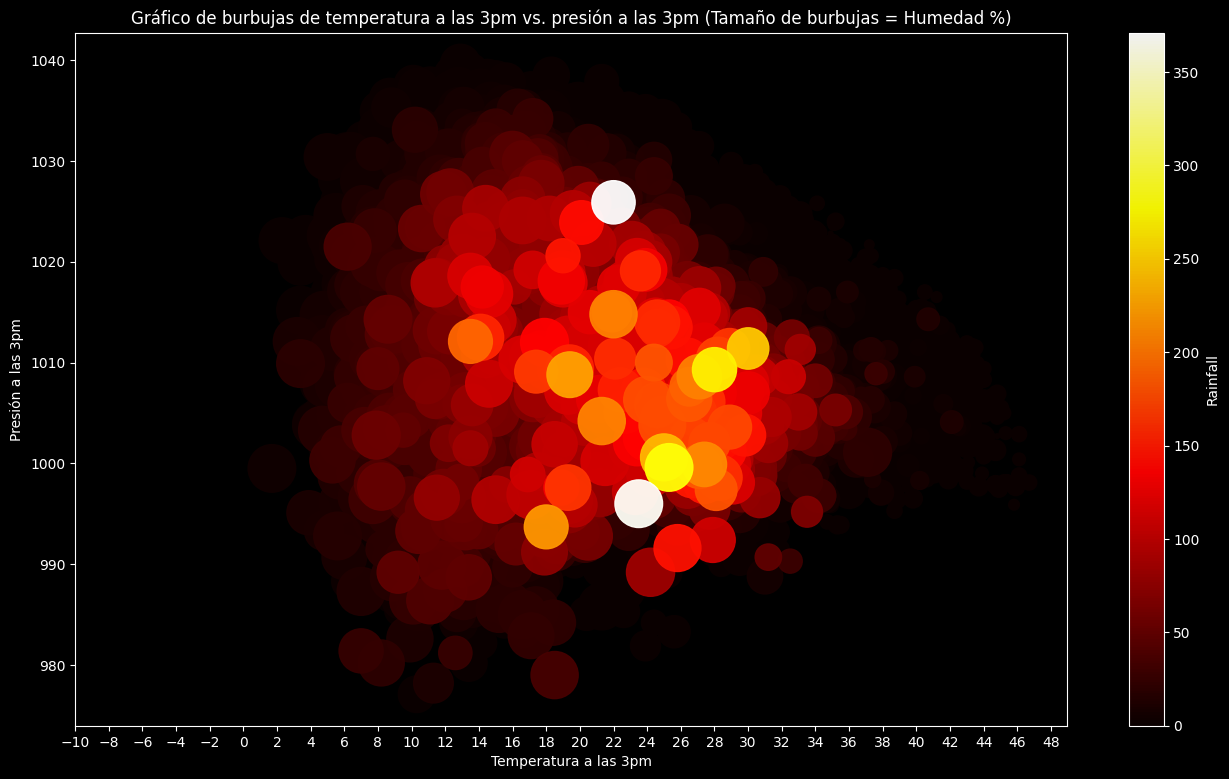

In [ ]:
plt.figure(figsize=(16, 9))

# Ordenamos los datos por Rainfall para que los puntos con valores altos queden encima
df_sorted = df.sort_values(by='Rainfall')

# Creamos el gráfico de dispersión
plt.scatter(df_sorted['Temp3pm'], df_sorted['Pressure3pm'], alpha=0.95,
            s=df_sorted['Humidity3pm']*12,
            c=df_sorted['Rainfall'],
            cmap='hot')

plt.colorbar(label='Rainfall')

# Configuramos los ticks del eje X para que vayan de 4 en 4, comenzando desde 0
x_ticks = np.arange(-10, 50, 2)
plt.xticks(x_ticks)


plt.title('Gráfico de burbujas de temperatura a las 3pm vs. presión a las 3pm (Tamaño de burbujas = Humedad %)')
plt.xlabel('Temperatura a las 3pm')
plt.ylabel('Presión a las 3pm')
plt.show()


## Gráfico de burbujas de temperatura a las 9am vs. presión a las 9am (Tamaño de burbujas = Humedad %)

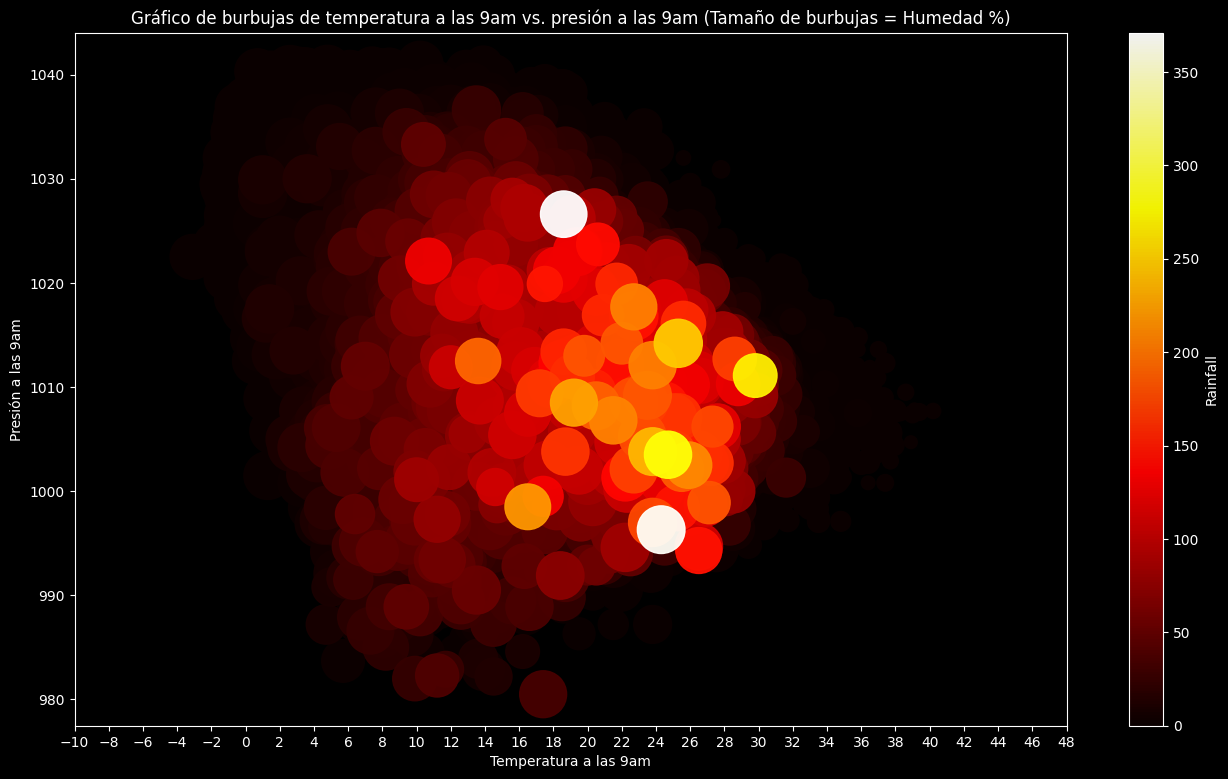

In [ ]:
plt.figure(figsize=(16, 9))

# Ordenamos los datos por Rainfall para que los puntos con valores altos queden encima
df_sorted = df.sort_values(by='Rainfall')

# Creamos el gráfico de dispersión
plt.scatter(df_sorted['Temp9am'], df_sorted['Pressure9am'], alpha=0.95,
            s=df_sorted['Humidity9am']*12,
            c=df_sorted['Rainfall'],
            cmap='hot')

plt.colorbar(label='Rainfall')

# Configuramos los ticks del eje X para que vayan de 4 en 4, comenzando desde 0
x_ticks = np.arange(-10, 50, 2)
plt.xticks(x_ticks)


plt.title('Gráfico de burbujas de temperatura a las 9am vs. presión a las 9am (Tamaño de burbujas = Humedad %)')
plt.xlabel('Temperatura a las 9am')
plt.ylabel('Presión a las 9am')
plt.show()


## Gráficos 3D (Patrones con profundidad)

### Gráfico 3D de temperatura a las 9am, humedad a las 9am, presión a las 9am y Rainfall (+ Ubicación y Nubosidad)

In [ ]:
df_sorted = df.sort_values(by='Rainfall')

In [ ]:
import plotly.express as px

# Data frame
df_sorted = df_sorted.dropna(subset=['Rainfall'])
df_graph = df_sorted[['Temp9am', 'Pressure9am', 'Humidity9am', 'Rainfall', 'Location', 'Cloud9am']] #.iloc[:40000]

# Generamos el gráfico 3D interactivo con plotly
fig = px.scatter_3d(df_graph, x='Humidity9am', y='Pressure9am', z='Temp9am',
                    color='Rainfall', hover_data=['Location', 'Cloud9am'],
                    color_continuous_scale='balance',  opacity=0.9)

fig.update_layout(title='Gráfico 3D de temperatura a las 9am, humedad a las 9am, presión a las 9am y Rainfall (+ Ubicación y Nubosidad)',
                  autosize=False, width=1100, height=800,
                  template='plotly_dark')

fig.show()


Output hidden; open in https://colab.research.google.com to view.

### Gráfico 3D de temperatura a las 3pm, humedad a las 3pm, presión a las 3pm y Rainfall (+ Ubicación y Nubosidad)

In [ ]:
import plotly.express as px

# Limitamos el DataFrame a las primeras 40000 muestras
df_sorted = df_sorted.dropna(subset=['Rainfall'])
df_graph = df_sorted[['Temp3pm', 'Pressure3pm', 'Humidity3pm', 'Rainfall', 'Location', 'Cloud3pm']] #.iloc[:40000]

# Generamos el gráfico 3D interactivo con plotly
fig = px.scatter_3d(df_graph, x='Humidity3pm', y='Pressure3pm', z='Temp3pm',
                    color='Rainfall', hover_data=['Location','Cloud3pm'],
                    color_continuous_scale='Thermal', opacity=0.8)

fig.update_layout(title='Gráfico 3D de temperatura a las 3pm, humedad a las 3pm, presión a las 3pm y Rainfall (+ Ubicación y Nubosidad)',
                  autosize=False, width=1100, height=800,
                  template='plotly_dark') # add this line

fig.show()


Output hidden; open in https://colab.research.google.com to view.

### Imagenes de referencia:

Darwin

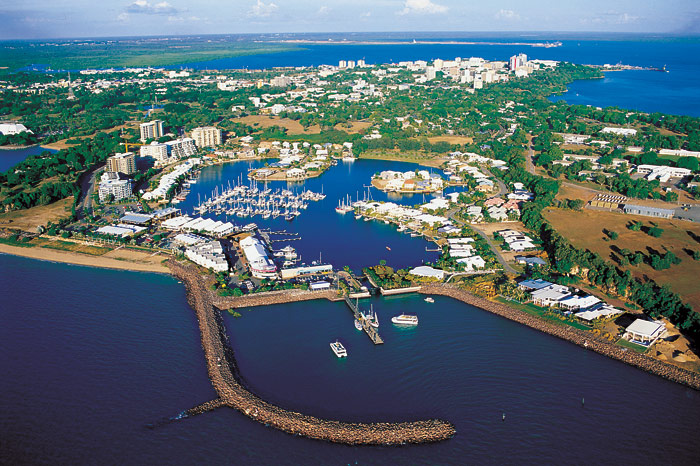

Cairns

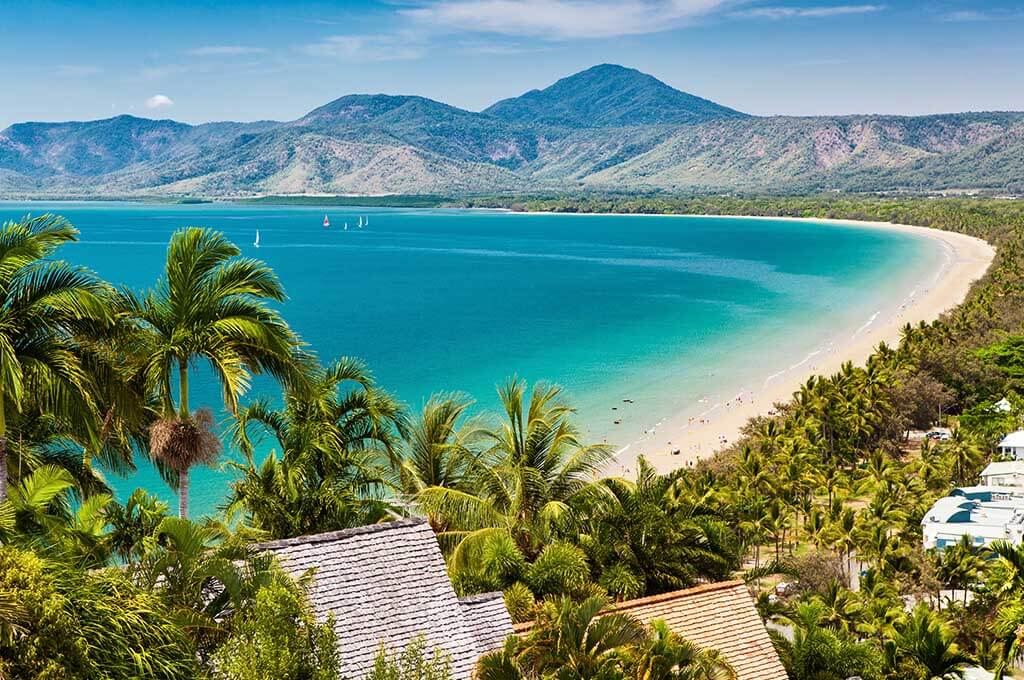

Alice Springs

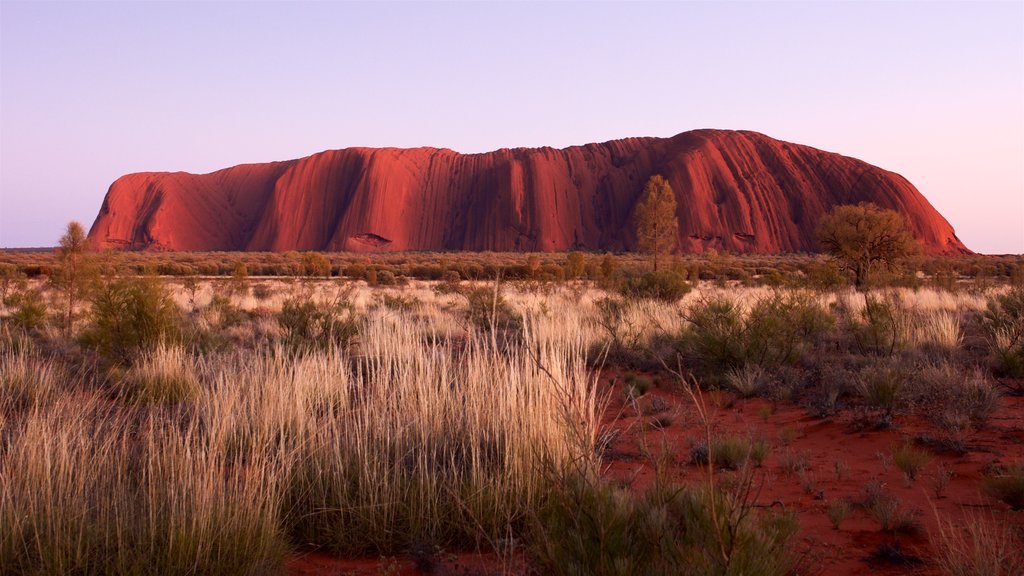

In [ ]:
"""
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

In [ ]:
import pandas as pd

# Create a DataFrame

# Get a list of all unique locations
unique_locations = df_sorted['Location'].unique()

# Print the list of unique locations
print(unique_locations)


['Canberra' 'Sale' 'Uluru' 'Nuriootpa' 'PearceRAAF' 'Moree' 'Mildura'
 'NorfolkIsland' 'Witchcliffe' 'Newcastle' 'PerthAirport' 'Bendigo'
 'Perth' 'Ballarat' 'Albury' 'Cairns' 'Launceston' 'Hobart' 'Nhil'
 'Brisbane' 'MelbourneAirport' 'Watsonia' 'Woomera' 'CoffsHarbour'
 'SalmonGums' 'Walpole' 'Melbourne' 'AliceSprings' 'Tuggeranong'
 'Dartmoor' 'Townsville' 'Albany' 'MountGambier' 'SydneyAirport'
 'Adelaide' 'Williamtown' 'Richmond' 'WaggaWagga' 'Sydney' 'Darwin'
 'Penrith' 'Portland' 'Katherine' 'BadgerysCreek' 'NorahHead' 'Cobar'
 'MountGinini' 'GoldCoast' 'Wollongong']


In [ ]:
# Dictionary with the coordinates for each location
city_coords = {
    'Canberra': (-35.2809, 149.1300),
    'Sale': (-38.1026, 147.0660),
    'Uluru': (-25.3444, 131.0369),
    'Nuriootpa': (-34.4694, 139.0016),
    'PearceRAAF': (-31.6671, 116.0290),
    'Moree': (-29.4658, 149.8337),
    'Mildura': (-34.2068, 142.1356),
    'NorfolkIsland': (-29.0408, 167.9547),
    'Witchcliffe': (-34.0236, 115.1005),
    'Newcastle': (-32.9267, 151.7800),
    'PerthAirport': (-31.9403, 115.9672),
    'Bendigo': (-36.7570, 144.2794),
    'Perth': (-31.9505, 115.8605),
    'Ballarat': (-37.5622, 143.8607),
    'Albury': (-36.0737, 146.9135),
    'Cairns': (-16.9186, 145.7781),
    'Launceston': (-41.4332, 147.1441),
    'Hobart': (-42.8821, 147.3272),
    'Nhil': (-36.3328, 141.6503),
    'Brisbane': (-27.4698, 153.0251),
    'MelbourneAirport': (-37.6690, 144.8410),
    'Watsonia': (-37.7110, 145.0830),
    'Woomera': (-31.1656, 136.8193),
    'CoffsHarbour': (-30.2963, 153.1135),
    'SalmonGums': (-32.9815, 121.6432),
    'Walpole': (-34.9777, 116.7338),
    'Melbourne': (-37.8136, 144.9631),
    'AliceSprings': (-23.6980, 133.8807),
    'Tuggeranong': (-35.4244, 149.0889),
    'Dartmoor': (-37.9225, 141.2767),
    'Townsville': (-19.2583, 146.8169),
    'Albany': (-35.0275, 117.8836),
    'MountGambier': (-37.8284, 140.7804),
    'SydneyAirport': (-33.9399, 151.1753),
    'Adelaide': (-34.9285, 138.6007),
    'Williamtown': (-32.8150, 151.8428),
    'Richmond': (-33.6001, 150.7412),
    'WaggaWagga': (-35.1150, 147.3678),
    'Sydney': (-33.8688, 151.2093),
    'Darwin': (-12.4634, 130.8456),
    'Penrith': (-33.7510, 150.6942),
    'Portland': (-38.3634, 141.6072),
    'Katherine': (-14.4642, 132.2635),
    'BadgerysCreek': (-33.8958, 150.7281),
    'NorahHead': (-33.2811, 151.5678),
    'Cobar': (-31.4983, 145.8344),
    'MountGinini': (-35.5294, 148.7723),
    'GoldCoast': (-28.0167, 153.4000),
    'Wollongong': (-34.4338, 150.8830)
}


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Filter for 2012 data
df_2012 = df_sorted[df_sorted['Date'].dt.year == 2012]

# Create new columns for the coordinates
df_2012.loc[:, 'lat'] = df_2012['Location'].apply(lambda x: city_coords[x][0])
df_2012.loc[:, 'lon'] = df_2012['Location'].apply(lambda x: city_coords[x][1])

# Aggregate data by week
df_weekly = df_2012.groupby(df_2012['Date'].dt.isocalendar().week).mean().reset_index()

# Create frames for each week
frames = []
for i, row in df_weekly.iterrows():
    df_week = df_2012[df_2012['Date'].dt.isocalendar().week == row['week']]
    frame = go.Frame(
        data=go.Densitymapbox(
            lat=df_week['lat'],  # Latitude values
            lon=df_week['lon'],  # Longitude values
            z=df_week['Rainfall'],  # Rainfall values
            radius=25,  # Increase the radius of the density points
            colorscale='Thermal',  # Adjust the colorscale as desired
            colorbar_title="Rainfall",
            hovertemplate='<b>Location</b>: %{text}<br><b>Rainfall</b>: %{z}<br>' +
                          '<b>Cloud3pm</b>: %{customdata[0]}<br>' +
                          '<b>Pressure3pm</b>: %{customdata[1]}<br>' +
                          '<b>Temperature3pm</b>: %{customdata[2]}<extra></extra>',
            customdata=df_week[['Cloud3pm', 'Pressure3pm', 'Temp3pm']]
        ),
        name=f"Week {row['week']}"
    )
    frames.append(frame)

# Create the figure
fig = go.Figure(
    data=[go.Densitymapbox(
        lat=df_2012['lat'],  # Latitude values
        lon=df_2012['lon'],  # Longitude values
        z=df_2012['Rainfall'],  # Rainfall values
        radius=25,  # Increase the radius of the density points
        colorscale='Thermal',  # Adjust the colorscale as desired
        colorbar_title="Rainfall",
        hovertemplate='<b>Location</b>: %{text}<br><b>Rainfall</b>: %{z}<br>' +
                      '<b>Cloud3pm</b>: %{customdata[0]}<br>' +
                      '<b>Pressure3pm</b>: %{customdata[1]}<br>' +
                      '<b>Temperature3pm</b>: %{customdata[2]}<extra></extra>',
        customdata=df_2012[['Cloud3pm', 'Pressure3pm', 'Temp3pm']],
        text=df_2012['Location']
    )],
    frames=frames
)

# Set the layout for the figure
fig.update_layout(
    title='Heatmap of Rainfall across Locations in Australia',
    mapbox=dict(
        style='carto-darkmatter',  # Adjust the mapbox style to dark mode
        center=dict(lat=-25, lon=135),  # Adjust the center of the map
        zoom=3  # Adjust the zoom level of the map
    ),
    width=1000,  # Adjust the width as needed
    height=600,  # Adjust the height as needed
    margin=dict(l=0, r=0, t=50, b=0),  # Adjust the margins
    hovermode='closest',  # Enable closest hover mode
    hoverlabel=dict(bgcolor='rgba(0, 0, 0, 0.6)', font=dict(color='white')),  # Hover label customization
    coloraxis=dict(colorbar=dict(bgcolor='rgb(50,50,50)', tickfont=dict(color='white'))),  # Colorbar customization
)

# Set dark mode colors and backgrounds
fig.update_layout(
    plot_bgcolor='rgb(30,30,30)',  # Dark background color
    paper_bgcolor='rgb(30,30,30)',  # Dark paper color
    font=dict(color='white'),  # Text color
)

# Add the slider
fig.update_layout(
    updatemenus=[
        dict(
            type='buttons',
            buttons=[
                dict(
                    label='Play',
                    method='animate',
                    args=[None, {
                        'frame': {'duration': 250, 'redraw': True},
                        'fromcurrent': True,
                        'transition': {'duration': 0}}],
                ),
                dict(
                    label='Pause',
                    method='animate',
                    args=[[None], {
                        'frame': {'duration': 0, 'redraw': False},
                        'mode': 'immediate',
                        'transition': {'duration': 0}}],
                )
            ],
            direction='left',
            showactive=False,
            x=0.1,
            y=0,
            xanchor='right',
            yanchor='top'
        )
    ],
    sliders=[{
        'active': 0,
        'yanchor': 'top',
        'xanchor': 'left',
        'currentvalue': {
            'prefix': 'Week: ',
            'visible': True,
            'xanchor': 'right'
        },
        'transition': {'duration': 0},
        'pad': {'b': 10, 't': 50},
        'len': 0.9,
        'x': 0.1,
        'y': 0,
        'steps': [
            {'args': [[frame.name], {'frame': {'duration': 500, 'redraw': True}, 'mode': 'immediate'}], 'label': frame.name, 'method': 'animate'}
            for frame in frames
        ]
    }]
)

fig.show()


<ipython-input-56-7b68e30196d5>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-56-7b68e30196d5>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-56-7b68e30196d5>:12: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 46.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 101.9 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp310-cp310-linux_x86_64.whl size=11102755 sha256=bb75085e333e81fa3dc72735c5a13a2b5388bb5b83aaa9e7ca6ea9258ade4025
  Stored in directory: /root/.cache/pip/wheels/30/b0/1a/1c1909e00c76653dc4e2ff48555257c0eb2d1698280c8d9955
Successfully built cartopy
